In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.plotly as plotl
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
import urllib2
import urllib
import time
import json
import nltk
import string
import geocoder
import itertools
import re
import os, csv
import collections
import preprocessor as p
from pylab import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import rbf_kernel
from wordcloud import WordCloud
from plotly.tools import FigureFactory as FF
from textblob import TextBlob
from pandas.io.json import json_normalize
from functools import partial
from multiprocessing import Pool
from pattern.text.en import singularize
from pattern.en import parse
from pattern.en import tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from unicodedata import normalize
import unicodedata as ud
from nltk import bigrams 
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
from geopy.geocoders import Nominatim
plt.style.use('ggplot')  
tls.set_credentials_file(username='nweat', api_key='BgNMfzTIbo5F2wPiSCCF')
from unidecode import unidecode
import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = default_stdout
sys.stderr = default_stderr
pd.set_option('max_colwidth', 800)
pd.set_option('max_rows', 1000)
###################################################################
## USEFUL FOR ANALYSIS, VISUALIZATIONS
#http://kyrandale.com/static/talks/reveal.js/index_pydata2015.html#/3
#http://adilmoujahid.com/posts/2015/01/interactive-data-visualization-d3-dc-python-mongodb/
#http://www.d3noob.org/2013/02/update-d3js-data-dynamically-button.html
#textblob
#https://www.quora.com/What-are-the-best-ways-to-do-Twitter-sentiment-analysis-in-R-with-offline-datasets
#csvDf.to_json(path_or_buf = None, orient = 'records', date_format = 'epoch', double_precision = 10, force_ascii = True, date_unit = 'ms', default_handler = None)
#http://machinelearningmastery.com/time-series-data-visualization-with-python/
#http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [6]:
##################################################################################
# LOAD VARIABLES
###################################################################################
user_data = 'final_data/users_final/'
user_list = 'final_data/users_final/user_list/'
user_details = pd.read_csv('initial_data/selected_bipolar_users.csv')
mood_lexicon_output = 'final_data/mood_lexicon.csv'
CSV_labeledMissingGeo_output = user_data + 'labelMIssingGeo2.csv' #output from multi_processing_file
CSV_preprocessing_output = user_data + 'labelMIssingGeo_preprocessed.csv'
CSV_sentiment140_output = user_data + 'labelMIssingGeo_preprocessed_sentiment.csv'
CSV_emotion_output = user_data + 'labelMIssingGeo_preprocessed_sentiment_emotion.csv'
CSV_keywords_output = user_data + 'labelMIssingGeo_preprocessed_sentiment_emotion_keywords.csv'
tweets = pd.read_csv(CSV_labeledMissingGeo_output) #initial data loading engine='python'
#normal_tweets = CSV_keywords_output = user_data + 'labelMIssingGeo_preprocessed_sentiment_emotion_keywords_normalusers.csv'
normal_users = pd.read_csv('final_data/users_final_normal/labelMIssingGeo_preprocessed_sentiment_emotion_keywords_normalusers.csv')
revised_list = ['CheerForceJonny' ,'jrgibson1', 'DHum93', 'adriantjj', 'TourPooch', 'kaseyroz',
 'jernigan007', 'ordinarywmn', 'CocoJGingerSays', 'TotalTrafficLA',
 'lokjianqun', 'sactraffic', 'thisiswendy', 'levar25', 'fmaschool',
 'christensenhope', 'tanjclark' ,'ssavvannahh_', 'mehitabel007', 'sarahdawne_',
 'jayariggs', 'sotonships', 'simplyagirl', 'kalebhouser', 'stevesloboda',
 'travisfox360', 'ryderreid', 'ERodWNEW', 'iAmMrCarson', 'StarletonEnt',
 'Brynn_Music', 'MetroMinh', 'Kayla_Brady', 'd_jones', 'sdrj77', 'ariafwright',
 'mrsbell0611', 'kinjapan86', 'KaySan23', 'SidsPubs', 'monikersss' ,'KREY__',
 'AlexAnthony82nd', 'mark_mctaggart', 'stephasito', 'DarrelHaynes',
 'beatrina_marie', 'KarlLunz', 'Citylife80' ,'CTDOT_District3' ,'_LykNoOtha',
 'bitswizzler' ,'_RiRi_123', 'hstovallmemphis' ,'kuekj', 'L_Smith13',
 'All_About_Mynz', 'MissAmandaK426', 'CizzyFizzil', 'Salty_Moustache', 'capey',
 'JSlayHerCEO', 'tjloretto', 'JamieLynnCantu' ,'VicTraffic' ,'IAmJulioL',
 'mattrogan1', 'Captain_Strongo', 'proudestmonkee', 'johntolva', 'sodapopsonia',
 'HeyWrongMan', 'thepaddedcell', 'HoHo23' ,'a_travel_bot', 'eri_Stackzzz',
 'lrgmnky', 'AnthonyArtefakt', 'pizzaandpumps' ,'motogpnz' ,'jacky_boy24',
 'scottmicciche' ,'itsmalorna' ,'realNYCbot', 'lexy_swenson', 'merrickrutledge',
 'VictoriaTheo', 'DoubleD_Dohn', 'maxgoedjen' ,'ABigels', 'kennyvtweets',
 'NikkyWalks', 'nmetos', 'nickspeaks', 'OneRadicalDude']

normal_users = normal_users[normal_users['username'].isin(revised_list)]
normal_users['location'] = normal_users.tweetLat.astype(str).str.cat(normal_users.tweetLong.astype(str), sep=' ')
#keywordLabelled.drop('polarity', axis=1, inplace=True)
normal_users.rename(columns={'ACTIVATION_UNPLEASANT': 'activation-unpleasant', 
                                'ACTIVATION_PLEASANT': 'activation-pleasant',
                                'DEACTIVATION_PLEASANT': 'deactivation-pleasant',
                                'DEACTIVATION_UNPLEASANT': 'deactivation-unpleasant',
                                'idfhashtags_matched': 'awareness-hashtags',
                                'suic_words_matched': 'suicide-words',
                                'phyiscal_symptoms_matched': 'depressive-symptoms',
                                'religious_words_matched': 'religious-inspirations',
                                'medications_matched': 'medication-mentions',
                                'alcohol_abuse_words_matched': 'alcohol-abuse-words',
                                'engagement_changes_matched': 'hyper-active-symptoms'
                               }, inplace=True)

STOP = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

##################################################################################
# HELPER FUNCTIONS
###################################################################################

# input - df: a Dataframe, chunkSize: the chunk size
# output - a list of DataFrame
# purpose - splits the DataFrame into smaller of max size chunkSize (last is smaller)
# http://stackoverflow.com/questions/17315737/split-a-large-pandas-dataframe
def splitDataFrameIntoSmaller(df, chunkSize = 10000): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

##################################################################################
# Lable emojis with their emotion *NOT PRIORITY
##################################################################################
EMOJI_LIST = pd.read_csv('final_data/emoji_table.csv', encoding='utf-8')
def unicodeEscapeEmoji(row):
    row['unicode_escape'] = row['emoji'].encode('unicode_escape')
    return row
EMOJI_LIST = EMOJI_LIST.apply(unicodeEscapeEmoji, axis = 1)
EMOJI_LIST.head(4)


##################################################################################
# MOOD LEXICON PREPARATION (DEPECHE MOOD LEXICON: AFRAID, AMUSED, ANGRY, ANNOYED, DONT CARE, HAPPY, INSPIRED, SAD)
# DESCRIPTION: 
# Extract Lemma, label NTLK POS
# REFERENCES: http://www.nltk.org/book/ch05.html
###################################################################################
mood_lexicon = pd.read_table('DepecheMood_V1.0/DepecheMood_normfreq.txt')

def extractPOS(lemmaPos):
    return lemmaPos.split('#')[1]

def extractLemma(lemmaPos):
    return lemmaPos.split('#')[0]

def labelNLTKPos(pos):
    if pos == 'n':
        return 'NN'
    elif pos == 'a':
        return 'JJ'
    elif pos == 'r':
        return 'RB'
    elif pos == 'v':
        return 'V'
       
mood_lexicon['POS'] = mood_lexicon['Lemma#PoS'].apply(extractPOS)
mood_lexicon['Lemma'] = mood_lexicon['Lemma#PoS'].apply(extractLemma)
mood_lexicon['NLTKPos'] = mood_lexicon['POS'].apply(labelNLTKPos)
mood_lexicon.to_csv(mood_lexicon_output, index = False)
#mood_lexicon['Max_Weight'] = mood_lexicon[['AFRAID','AMUSED','ANGRY','ANNOYED','DONT_CARE','HAPPY','INSPIRED','SAD']].max(axis=1)
#mood_lexicon[mood_lexicon['Lemma'].isin(['friend','sad','lonely', 'kill', 'happy','never'])]
tweets = tweets[tweets['username'].isin([
"JaleesaJCollins",
"Margarita5Bar9",
"ColdHeartNoLove",
"mariaacolon_",
"KateWynne1",
"alhoover81",
"OfMiceAndManda1",
"seventimestom",
"ness_bill",
"haliemcarter",
"Patricks_Mommii",
"MaxwellVautour",
"GeorgeHunter_",
"Linton93",
"darthbender",
"Real_Maximilian",
"Rs668000",
"scaifejimbo",
"BrianCrimson",
"ThatKristaGirl",
"BrittanyElizab8",
"AtlantaHeiress",
"50ShadesOfThisD",
"srsly_jenna",
"bvb1123",
"nicolapow",
"cvbbm14",
"Taashieee_",
"SinVenus",
"luvthosebritmen",
"AmiElzbth",
"ray2xrodriguez",
"KingGas100",
"AmberNicole1205",
"Heather_fob",
"WowMarissa",
"CUAA1928",
"TheRoyalBentley",
"rojaskillsit",
"ChrisStrei",
"DawnTrundle",
"_MeggKNOgood",
"simpology1981",
"jimmypiper2",
"matea_friend",
"katiplease",
"bblaired",
"cass4504",
"mattduffin",
"HalanaCapitanio",
"amirmoslim",
"yogamanmatt",
"CanadianKindon",
"jenphoenix83",
"beebesharkey",
"mrstevief",
"JainaRenee",
"DarrenFiander",
"MjaBradshaw",
"Glennspillman",
"LostKaiyna",
"CountMatthula",
"MRSAXXMANN",
"Oello12",
"christ_halley",
"gnewfry",
"ecox42016",
"_gaaaaaaaaaaaby",
"EveOCative",
"BiPoHeather",
"CrippleTheBitch",
"LorrieArianna",
"_fuckenjoibear",
"ayelici",
"PieceOfRia",
"_MelisaMarie",
"AmyClareFrancis",
"Radica_XO_Khidd",
"maulydee",
"aliumph",
"iKeep_Going",
"louisep1982",
"FiltnessSue",
"MissShastaOwen",
"badkidvictoria",
"AwesomeAsh",
"karlzz19",
"Ellenskis",
"GeorgeWigen",
"ryanrkips23",
"edlukethird",
"embalmist99",
"MCurtis5220",
"damaster_88",
"Star7Yang"])] # filter users with false statement of diagnosis
tweets.tweetLang.unique() #explroe data to make sure data entered correcntly

array(['und', 'en', 'fi', 'es', 'sv', 'da', 'in', 'et', 'eu', 'de', 'tl',
       'pt', 'fr', 'ht', 'ro', 'hu', 'nl', 'is', 'lt', 'pl', 'tr', 'no',
       'ko', 'it', 'ja', 'hi', 'vi', 'lv', 'cy', 'sl', 'cs', 'zh', 'el'], dtype=object)

In [69]:
textt = 'You are appreciated. Thank you lovely puppies and cats, bipolar disorder happiest. You are hated hated upper-class running happyyyyy! ✊🏽🙌🏽.'.lower()
text = textt.lower()
text = re.compile(r"(?:\@|https?\://)\S+").sub('', re.compile('rt @').sub('@', text).strip())
text = re.sub("[#]", "", text).strip()
text = p.clean(text)
#text = re.sub(r"(?:[a-z][a-z'\-_]+[a-z])", "", text).strip() 
#text = re.sub(r"([a-z])\-([a-z])", r"\1 \2", text , 0, re.IGNORECASE) # remove dashes in words
text = text.translate(None, string.punctuation)
words = text.split()
#text = " ".join(sorted(set(words), key=words.index))
text = text.encode('utf-8').encode('unicode_escape') # try unidecode(text) better
tokenized = nltk.word_tokenize(text) #text.split() #word_tokenize(text)
stop_words_removed = [w for w in tokenized if not w in STOP]
stop_words_removedtext = " ".join(tokenized)

final_text_lemmatized=''
for word, pos in tag(stop_words_removedtext):
    if pos.startswith("J") == True:
        final_text_lemmatized += ' '+ lemmatiser.lemmatize(word, pos="a")
    if pos.startswith("N") == True:
        final_text_lemmatized += ' '+ lemmatiser.lemmatize(word, pos="n")
    if pos.startswith("V") == True:
        final_text_lemmatized += ' '+ lemmatiser.lemmatize(word, pos="v")
    if pos.startswith("R") == True:
        final_text_lemmatized += ' '+ lemmatiser.lemmatize(word, pos="r")
        
nouns = [lemmatiser.lemmatize(word,pos="n") for word, pos in tag(text) if pos.startswith("N") == True]
verbs = [lemmatiser.lemmatize(word, pos="v") for word, pos in tag(text) if pos.startswith("V") == True]
adverb = [lemmatiser.lemmatize(word, pos="r") for word, pos in tag(text) if pos.startswith("R") == True]
adjectives = [lemmatiser.lemmatize(word, pos="a") for word, pos in tag(text) if pos.startswith("J") == True]  

print nouns
print verbs
print adverb
print adjectives

#subject = textt
#subject = re.sub(r"([a-z])\-([a-z])", r"\1 \2", subject , 0, re.IGNORECASE)
#subject = subject.translate(None, string.punctuation)
#tokenized = list(set(tokenizedd))
#tokenized = [lemmatiser.lemmatize(plural) for plural in tokenized]
#print subject
print final_text_lemmatized

[u'thank', u'puppy', u'cat', u'disorder', u'upperclass', u'happyyyyy', u'\\u270a\\U0001f3fd\\U0001f64c\\U0001f3fd']
[u'be', u'appreciate', u'be', u'hat', u'hat', u'run']
[]
[u'lovely', u'bipolar', u'happy']
 be appreciate thank lovely puppy cat bipolar disorder happy be hat hat upperclass run happyyyyy \u270a\U0001f3fd\U0001f64c\U0001f3fd


In [48]:
##################################################################################
# REMOVE RETWEETS FROM DATA *DIDNT IMPLEMENT THIS
##################################################################################
mask = tweets['tweetText'].str.contains('RT @')
tweets[mask]

,userid,username,tweetCreated,tweetLang,tweetText,hashtags,mentions,favorites,retweet,tweetLat,tweetLong,userLocation,countryCode
3,73755799,badkidvictoria,2017-02-14 17:56:15,en,"RT @ladygaga: Happy Valentine's Day everyone. If you have someone special, give them a kiss. If you don't, make a voodoo doll of your ex an…",NaN,@ladygaga,0,50150,53.493680,-2.186851,NaN,NaN
5,73755799,badkidvictoria,2017-02-14 17:11:48,en,RT @FeudFX: They hated each other. And we loved them for it. Watch the OFFICIAL TRAILER for FEUD: Bette and Joan. Premieres 3/5 on @FXNetwo…,NaN,@FeudFX @FXNetwo,0,1692,53.493680,-2.186851,NaN,NaN
7,73755799,badkidvictoria,2017-02-14 14:40:06,en,RT @AstrologyOnIy: the signs as 2016 albums\r\r\n\r\r\naries ♈️ • joanne (lady gaga) https://t.co/RKnHWMyBru,NaN,@AstrologyOnIy,0,289,53.493680,-2.186851,NaN,NaN
11,73755799,badkidvictoria,2017-02-13 01:53:33,en,RT @Paula_PawsUp: FUCK ME TF UP https://t.co/aRQieXffal,NaN,@Paula_PawsUp,0,26,53.493680,-2.186851,NaN,NaN
12,73755799,badkidvictoria,2017-02-13 01:04:23,en,RT @holyh00ker: Wig is off. So are my pants. https://t.co/ATxPb1rsSJ,NaN,@holyh00ker,0,40,53.493680,-2.186851,NaN,NaN
17,73755799,badkidvictoria,2017-02-10 19:35:03,en,"RT @ladygaga: Wow!💘Thank u monsters, I'm so excited+grateful to see our shows selling out so quickly! Adding more dates where we can CANT W…",NaN,@ladygaga,0,8930,53.493680,-2.186851,NaN,NaN
20,73755799,badkidvictoria,2017-02-09 15:35:01,en,RT @bestofsusan: Susan Sarandon for 'Madame Figaro' magazine - 2016 \r\r\n\r\r\n(2/2) https://t.co/SKVSe6nVDU,NaN,@bestofsusan,0,11,53.493680,-2.186851,NaN,NaN
27,73755799,badkidvictoria,2017-02-07 12:40:03,und,RT @ladygaga: 🏈🏈#SB51 #PepsiHalftime #GagaBowl https://t.co/rDWCXd673N,#sb51 #pepsihalftime #gagabowl,@ladygaga,0,36035,53.493680,-2.186851,NaN,NaN
28,73755799,badkidvictoria,2017-02-06 03:33:22,en,"RT @HillaryClinton: I'm one of 100 million #SuperBowl fans that just went #Gaga for the Lady, &amp; her message to all of us. https://t.co/8AoN…",#superbowl #gaga,@HillaryClinton,0,62398,53.493680,-2.186851,NaN,NaN
32,73755799,badkidvictoria,2017-02-06 00:50:36,en,"RT @ladygaga: This is for you, Monsters. I love you. https://t.co/1Wh56OThzm",NaN,@ladygaga,0,50229,53.493680,-2.186851,NaN,NaN


In [18]:
##################################################################################
# PREPROCESS EVERY TWEET
# DESCRIPTION:
# Remove URL, mentions, RT word, 
# REFERENCES:
# http://www.clips.ua.ac.be/pages/pattern-en#ngram
# POSSIBLE FIXES:
# Spelling errors
# Fix stemming e.g. jesu should be jesus
# Replace emojis and smileys with word emotion
# To speed up: http://stackoverflow.com/questions/26784164/pandas-multiprocessing-apply
# http://iacs-courses.seas.harvard.edu/courses/iacs_projects/sentimentanalysisforfinance.wordpress.com/data-preprocessing/index.html
# TO ADD IF HAVE TIME:
# ADDITIONS IF HAVE TIME: replace emoji with emotion name, smileys, remove retweets and duplicate tweets?? 
# remove numbers:
# https://github.com/nweat/mental-health-research/blob/master/patient_tweet_analysis/tweets-keyword-extraction.py
# https://marcobonzanini.com/2015/01/26/stemming-lemmatisation-and-pos-tagging-with-python-and-nltk/
###################################################################################
p.set_options(p.OPT.NUMBER) #p.OPT.SMILEY, p.OPT.EMOJI, 
preprocessTweets = splitDataFrameIntoSmaller(tweets, 3500)
frames = []
dfID = 0

def preprocessTweet(row):
    # must do this preprocessing step: lower text, remove mentions,numbers, RT, URLS, # sign but leave hashtag text, stemming
    text = row['tweetText'].lower()
    text = re.compile(r"(?:\@|https?\://)\S+").sub('', re.compile('rt @').sub('@', text).strip())
    text = re.sub("[#]", "", text).strip()
    text = p.clean(text)
    #text = re.sub(r"(?:[a-z][a-z'\-_]+[a-z])", "", text).strip() 
    #text = re.sub(r"([a-z])\-([a-z])", r"\1 \2", text , 0, re.IGNORECASE) # remove dashes in words
    text = text.translate(None, string.punctuation)
    words = text.split()
    #text = " ".join(sorted(set(words), key=words.index))
    text = text.encode('utf-8').encode('unicode_escape') # try unidecode(text) better
     
    #text = unidecode(text.replace('"',''))
    tokenized = nltk.word_tokenize(text) #text.split() #word_tokenize(text)
    #tokenized = list(set(tokenized)) # remove duplicates
    #tokenized = [singularize(plural) for plural in tokenized] #stemmer
    
    stop_words_removed = [w for w in tokenized if not w in STOP]
    #stop_words_punc_removed = [l for l in stop_words_removed if l not in string.punctuation]
    #tokenized_postag = nltk.pos_tag(tokenized)
    nouns = [lemmatiser.lemmatize(word,pos="n") for word, pos in tag(text) if pos.startswith("N") == True]
    verbs = [lemmatiser.lemmatize(word, pos="v") for word, pos in tag(text) if pos.startswith("V") == True]
    adverb = [lemmatiser.lemmatize(word, pos="r") for word, pos in tag(text) if pos.startswith("R") == True]
    adjectives = [lemmatiser.lemmatize(word, pos="a") for word, pos in tag(text) if pos.startswith("J") == True]
    row['stopWordsPuncRemoved'] = stop_words_removed #stop_words_punc_removed
    row['withStopWords'] = tokenized
    row['adjectives'] = adjectives
    row['verbs'] = verbs
    row['adverb'] = adverb
    row['nouns'] = nouns
    return row

for i in preprocessTweets:
    dfID += 1
    dfName = 'df' + str(dfID)
    print dfName
    i = i.apply(preprocessTweet, axis = 1)
    frames.append(i)
    #break

preprocessedTweets = pd.concat(frames)
preprocessedTweets.to_csv(CSV_preprocessing_output, index = False, quotechar='"', quoting=csv.QUOTE_ALL)
preprocessedTweets[preprocessedTweets['username'] == 'RashadHouston'] #.head(2)

df1
df2
df3
df4
df5
df6
df7
df8
df9
df10
df11
df12
df13
df14
df15
df16
df17
df18
df19
df20
df21
df22
df23
df24
df25
df26
df27
df28
df29
df30
df31
df32
df33
df34
df35
df36
df37
df38
df39
df40
df41
df42
df43
df44
df45
df46
df47
df48
df49
df50
df51
df52
df53
df54
df55
df56
df57
df58
df59
df60
df61
df62
df63
df64
df65
df66
df67
df68
df69
df70
df71


,userid,username,tweetCreated,tweetLang,tweetText,hashtags,mentions,favorites,retweet,tweetLat,tweetLong,userLocation,countryCode,stopWordsPuncRemoved,withStopWords,adjectives,verbs,adverb,nouns


In [70]:
##################################################################################
# SENTIMENT 140 TWEET LABELLING
# SAMPLE INPUT: '{"data": [{"text": "But I also pray for peace and healing."},{"text": "I hate Titanic."}]}'
# SAMPLE OUTPUT: '{"data":[{"text":"I love Titanic.","polarity":4}]}'
# map back to original structure along with newly added sentiment label
# REFERENCES: https://www.webstreaming.com.ar/articles/using-sentiment-analysis-and-python-to-evaluate-image-in-twitter-for-the-most-important-argentinian-candidates/
###################################################################################
dfID = 0
tweets = []
frames = []

try:
    preprocessedTweets
except NameError:
    preprocessedTweets = pd.read_csv(CSV_preprocessing_output)

labelSentiment = splitDataFrameIntoSmaller(preprocessedTweets, 10000)
sentimentLabelledTweets = pd.DataFrame()

def formatData(row):
    text = " ".join(row.withStopWords).strip()
    tweets.append({'id': row.name,
                   'text': unidecode(text) # CHANGE TO USE FIELD 'withStopWords'
                  })

for i in labelSentiment:
    dfID += 1
    dfName = 'df' + str(dfID)
    i.apply(formatData, axis = 1)
    toSend = {"data" : tweets}
    req = urllib2.Request("http://www.sentiment140.com/api/bulkClassifyJson")
    req.add_header('Content-Type', 'application/json')
    response = urllib2.urlopen(req, str(toSend))
    json_response = json.loads(response.read())
    dfName = json_normalize(json_response['data'])
    dfName = dfName.set_index(['id'])
    frames.append(dfName)
    tweets = []
    print len(dfName)
    
combined_frames = pd.concat(frames) 
sentimentLabelledTweets = pd.concat([preprocessedTweets, combined_frames], axis=1, join='inner') 
sentimentLabelledTweets.drop('userid', axis=1, inplace=True)
sentimentLabelledTweets.drop('text', axis=1, inplace=True)
sentimentLabelledTweets.to_csv(CSV_sentiment140_output, index = False, quotechar='"', quoting=csv.QUOTE_ALL) #encoding = 'utf-8'
print len(sentimentLabelledTweets) 
sentimentLabelledTweets.head(1)

C:\Users\user\Anaconda2\lib\site-packages\unidecode\__init__.py:46: RuntimeWarning:

Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.



10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
7403
247403


,username,tweetCreated,tweetLang,tweetText,hashtags,mentions,favorites,retweet,tweetLat,tweetLong,...,countryCode,stopWordsPuncRemoved,withStopWords,adjectives,verbs,adverb,nouns,meta.language,meta.topic,polarity
id,,,,,,,,,,,,,,,,,,,,,
0,DarrenFiander,2017-02-16 11:32:10,und,https://t.co/Oryg4ab4Td,NaN,NaN,0,0,52.477771,-1.910521,...,NaN,[],[],[],[],[],[],en,NaN,2


In [78]:
##################################################################################
# CALCULATE AND LABEL MOOD STATES OF EACH PATIENTS TWEETS BASED ON DEPECHE MOOD LEXICON AND SENTIMENT LAE
# DESCRIPTION:
# For each tweet, tokenize, group all scores for each mood where weighting is over 15%
# FIXES:
# Select which tense of the word based on POS tag to choose bcas the lexicon has multiple e.g. will#v will#n, currently choosing verb
# REFERENCES:
# http://stackoverflow.com/questions/30787901/how-to-get-a-value-from-a-pandas-dataframe-and-not-the-index-and-object-type
###################################################################################
dfID = 0
frames = []
threshold = 0.20 # Consider emotions weighting over 15% for every word # try for 20%

try:
    sentimentLabelledTweets# = pd.read_csv(CSV_sentiment140_output, quotechar='"')
except NameError:
    sentimentLabelledTweets = pd.read_csv(CSV_sentiment140_output)
    
labelEmotion = splitDataFrameIntoSmaller(sentimentLabelledTweets, 2000)
    
def calcMoodStates(mood_lexicon, sentimentLabelledTweets):
    SAD_VALUES = []
    INSPIRED_VALUES = []
    HAPPY_VALUES = []
    DONT_CARE_VALUES = []
    ANNOYED_VALUES = []
    ANGRY_VALUES = []
    AMUSED_VALUES = []
    AFRAID_VALUES = []
    FOUND_WORDS = 0

    for token in sentimentLabelledTweets['withStopWords']: #was stopwordspuncremoved
        found = mood_lexicon.loc[mood_lexicon['Lemma'] == token]
        if len(found.index) > 1: 
            #found = found.iloc[1:2] #select the second by default
            if lemmatiser.lemmatize(token, pos="n") in sentimentLabelledTweets['nouns']:
                found = found.loc[found['POS'] == 'n']
            elif lemmatiser.lemmatize(token, pos="a") in sentimentLabelledTweets['adjectives']:
                found = found.loc[found['POS'] == 'a']
            elif lemmatiser.lemmatize(token, pos="v") in sentimentLabelledTweets['verbs']:
                found = found.loc[found['POS'] == 'v']
            elif lemmatiser.lemmatize(token, pos="r") in sentimentLabelledTweets['adverb']:
                found = found.loc[found['POS'] == 'r']
            FOUND_WORDS += 1
        elif len(found.index) == 1: 
            found = found.iloc[0:1]
            FOUND_WORDS +=1
        if any(found['SAD'] > threshold): SAD_VALUES.append(found['SAD'].round(2).values[0]) #np.append(SAD_VALUES, found['SAD'].round(2).values[0]) 
        if any(found['INSPIRED'] > threshold): INSPIRED_VALUES.append(found['INSPIRED'].round(2).values[0]) 
        if any(found['HAPPY'] > threshold): HAPPY_VALUES.append(found['HAPPY'].round(2).values[0])
        if any(found['DONT_CARE'] > threshold): DONT_CARE_VALUES.append(found['DONT_CARE'].round(2).values[0])
        if any(found['ANNOYED'] > threshold): ANNOYED_VALUES.append(found['ANNOYED'].round(2).values[0])
        if any(found['ANGRY'] > threshold): ANGRY_VALUES.append(found['ANGRY'].round(2).values[0]) 
        if any(found['AMUSED'] > threshold): AMUSED_VALUES.append(found['AMUSED'].round(2).values[0]) 
        if any(found['AFRAID'] > threshold): AFRAID_VALUES.append(found['AFRAID'].round(2).values[0]) 
    #AMUSED = np.nanmean(AMUSED_VALUES).round(2) #np.mean(AMUSED_VALUES).round(2)
    #HAPPY = np.nanmean(HAPPY_VALUES).round(2)
    #INSPIRED = np.nanmean(INSPIRED_VALUES).round(2)
    #SAD = np.nanmean(SAD_VALUES).round(2)
    #ANGRY = np.nanmean(ANGRY_VALUES).round(2)
    #AFRAID = np.mean(AFRAID_VALUES).round(2)
    #ANNOYED = np.nanmean(ANNOYED_VALUES).round(2)
    #DONT_CARE = np.nanmean(DONT_CARE_VALUES).round(2)
    ACTIVATION_PLEASANT = [HAPPY_VALUES + INSPIRED_VALUES]#[HAPPY,INSPIRED]
    DEACTIVATION_PLEASANT = [AMUSED_VALUES]
    ACTIVATION_UNPLEASANT = [ANGRY_VALUES + AFRAID_VALUES + ANNOYED_VALUES]
    DEACTIVATION_UNPLEASANT = [SAD_VALUES + DONT_CARE_VALUES]

    ACTIVATION_PLEASANTMN = np.nanmean(ACTIVATION_PLEASANT).round(2)
    ACTIVATION_UNPLEASANTMN = np.nanmean(ACTIVATION_UNPLEASANT).round(2)
    DEACTIVATION_UNPLEASANTMN = np.nanmean(DEACTIVATION_UNPLEASANT).round(2)
    DEACTIVATION_PLEASANTMN = np.nanmean(DEACTIVATION_PLEASANT).round(2)
    
    #HAPPY_CNT = np.count_nonzero([HAPPY_VALUES])
    #INSPIRED_CNT = np.count_nonzero([INSPIRED_VALUES])
    #ACTIVATION_PLEASANTRATIO = round(float(HAPPY_CNT+INSPIRED_CNT)/float(FOUND_WORDS),2) if FOUND_WORDS > 0 else 'NaN'
    
    sentimentLabelledTweets['ACTIVATION_PLEASANT'] = ACTIVATION_PLEASANTMN #np.mean(SAD_VALUES).round(2)
    sentimentLabelledTweets['ACTIVATION_UNPLEASANT'] = ACTIVATION_UNPLEASANTMN #np.mean(SAD_VALUES).round(2)
    sentimentLabelledTweets['DEACTIVATION_UNPLEASANT'] = DEACTIVATION_UNPLEASANTMN
    sentimentLabelledTweets['DEACTIVATION_PLEASANT'] = DEACTIVATION_PLEASANTMN
    #sentimentLabelledTweets['ACTIVATION_PLEASANT_RATIOTOP'] = [HAPPY_VALUES,INSPIRED_VALUES]
    #sentimentLabelledTweets['ACTIVATION_PLEASANT_RATIOBOTTOM'] = FOUND_WORDS
    #sentimentLabelledTweets['RESULT'] = ACTIVATION_PLEASANTRATIO
    
     # ADD SENTIMENT POLARITY REVISIONS, IF 4 ADD ROW TO LABEL POSITIVE, 
    sentimentLabelledTweets['positive'] = 1 if sentimentLabelledTweets['polarity'] == 4 else 0
    sentimentLabelledTweets['negative'] = 1 if sentimentLabelledTweets['polarity'] == 0 else 0
    sentimentLabelledTweets['neutral'] = 1 if sentimentLabelledTweets['polarity'] == 2 else 0
    
    #sentimentLabelledTweets['SAD'] = SAD_VALUES #np.mean(SAD_VALUES).round(2)
    #sentimentLabelledTweets['INSPIRED'] = INSPIRED_VALUES
    #sentimentLabelledTweets['HAPPY'] = HAPPY_VALUES
    #sentimentLabelledTweets['DONT_CARE'] = DONT_CARE_VALUES
    #sentimentLabelledTweets['ANNOYED'] = ANNOYED_VALUES
    #sentimentLabelledTweets['ANGRY'] = ACTIVATION_UNPLEASANT
    #sentimentLabelledTweets['AMUSED'] = AMUSED_VALUES
    #sentimentLabelledTweets['AFRAID'] = AFRAID_VALUES
    #sentimentLabelledTweets['FOUND_WORDS'] = FOUND_WORDS
    return sentimentLabelledTweets

for i in labelEmotion:
    dfID += 1
    dfName = 'df' + str(dfID)
    print dfName
    i = i.apply(partial(calcMoodStates, mood_lexicon), axis = 1)
    frames.append(i)
    #break
    
#sentimentLabelledTweets_emotion = sentimentLabelledTweets.apply(partial(calcMoodStates, mood_lexicon), axis = 1)
#sentimentLabelledTweets_emotion[['username','tweetCreated','tweetText','polarity']]

emotionLabelled = pd.concat(frames)
emotionLabelled.to_csv(CSV_emotion_output, index = False, quotechar='"', quoting=csv.QUOTE_ALL)
emotionLabelled[['tweetText','positive','ACTIVATION_PLEASANT','ACTIVATION_UNPLEASANT','DEACTIVATION_UNPLEASANT','DEACTIVATION_PLEASANT']]

df1
df2
df3
df4
df5
df6
df7
df8
df9
df10
df11
df12
df13
df14
df15
df16
df17
df18
df19
df20
df21
df22
df23
df24
df25
df26
df27
df28
df29
df30
df31
df32
df33
df34
df35
df36
df37
df38
df39
df40
df41
df42
df43
df44
df45
df46
df47
df48
df49
df50
df51
df52
df53
df54
df55
df56
df57
df58
df59
df60
df61
df62
df63
df64
df65
df66
df67
df68
df69
df70
df71
df72
df73
df74
df75
df76
df77
df78
df79
df80
df81
df82
df83
df84
df85
df86
df87
df88
df89
df90
df91
df92
df93
df94
df95
df96
df97
df98
df99
df100
df101
df102
df103
df104
df105
df106
df107
df108
df109
df110
df111
df112
df113
df114
df115
df116
df117
df118
df119
df120
df121
df122
df123
df124


,tweetText,positive,ACTIVATION_PLEASANT,ACTIVATION_UNPLEASANT,DEACTIVATION_UNPLEASANT,DEACTIVATION_PLEASANT
id,,,,,,
0,https://t.co/Oryg4ab4Td,0,NaN,NaN,NaN,NaN
1,These diagrams show how people negotiate around the world - Norwegians fall somewhere between Swedes and Finns https://t.co/3whxe5w7hj 🇫🇮,0,0.23,NaN,0.22,NaN
2,RT @Cat_Marketing: Keep your robots off #SocialMedia! Customers prefer people. Discover our tips to keeping them engaged #TipTuesday https:…,0,0.22,NaN,0.41,NaN
3,RT @Cat_Marketing: How's everyone feeling this #ValentinesDay,0,0.22,NaN,NaN,NaN
4,Suomi houkuttaa terveysteknologian startupeja – 260 hakijaa kiihdyttämöön https://t.co/OjghxWRnEE,0,NaN,0.91,NaN,NaN
5,"RT @Cat_Marketing: Is it worth doing #marketing in-house, or is it time to consider why you should outsource your efforts? Blog: https://t.…",0,0.30,0.21,0.28,NaN
6,RT @Cat_Marketing: Forget about Danny Dyer - Our King of Strategy @DarrenFiander fancies his chances at being the next #DoctorWho 🐱 https:/…,0,0.31,NaN,0.25,0.40
7,Socialbakers Joins Pinterest #Marketing Partners Program https://t.co/wK8jCBmLpI,0,0.20,NaN,NaN,NaN
8,RT @Cat_Marketing: Our King of Strategy @DarrenFiander has experience in both traditional and digital marketing and has helped SMEs &amp; start…,0,0.22,0.26,0.23,0.22


In [3]:
##################################################################################
# KEYWORDS LABELLING TO ATTEMPT TO CAPTURE SPECIFIC SYMPTOMS INCLUDING:
# suicidal thoughts (depressive mood)
# physical symptoms e.g. weight gain, loss of interest, cyrying, headaches (depressive mood)
# alcohol use (start of mania (hypomania))
# high sex drive (start of mania (hypomania))
# spending sprees (start of mania (hypomania))
# religious inspirations (start of mania (hypomania))

# DESCRIPTION:
# Find occurences of defined keywords in tweets and label
###################################################################################
dfID = 0
frames = []

try:
    emotionLabelled # = pd.read_csv(CSV_sentiment140_output, quotechar='"')
except NameError:
    emotionLabelled = pd.read_csv(CSV_emotion_output)

labelKeywordFindings = splitDataFrameIntoSmaller(emotionLabelled, 4000)

# chosen based on tf-idf results extracted from sample of bipolar patients tweets
# MOST COMMON 400 WORDS SELECTED FOR EACH USER AND BASED ON THAT DID TF-IDF
idfhashtags = [
    r'\bbipolar\b',
    r'\bdepress\b',
    r'\bdepressed\b',
    r'\bmentalhealth\b',
    r'\bworldmentalhealthday\b',
    r'\bmentalhealthawareness\b',
    r'\banxiety\b',
    r'\bbipolardisorder\b',
    #r'\b#bipolar disorder\b',
    r'\bmentallillness\b'
]

## SUICIDE KEYWORDS DEPRESSIVE
suicide_words = [
    r'\bsuicide\b',
    r'\bsuicidal\b',
    r'\bnever wake up\b',
    r'\bkill myself\b',
    r'\bmy suicide note\b',
    r'\bend my life\b',
    r'\bcant go on\b',
    r'\bnot worth living\b',
    r'\bready to jump\b',
    r'\bsleep forever\b',
    r'\bwant to die\b',
    r'\bbe dead\b',
    r'\bbetter off without me\b',
    r'\bbetter off dead\b',
    r'\btired of living\b',
    r'\bdont want to be here\b',
    r'\bdie alone\b',
    r'\bsuicide plan\b',
    r'\bsuicide pact\b',
    r'\bsleep forever\b'
]


## BODY SYMPTOMS KEYWORDS DEPRESSIVE
phyiscal_symptoms = [
    r'\bgain weight\b',
    r'\beating too much\b',
    r'\blose weight\b',
    r'\btrouble sleeping\b',
    r'\bsleeping too much\b',
    r'\blose interest\b',
    r'\bcant concentrate\b',
    r'\bpain\b',
    r'\brestless\b',
    r'\bfeeling empty\b',
    r'\bfeeling sad\b',
    r'\bfeeling tired\b',
    r'\bfeeling worn out\b',
    r'\bcrying\b',
    r'\bheadaches\b',
    r'\bmigraines\b',
    r'\bconstipated\b',
    r'\bno sex life\b',
    r'\btired\b'
]


## MANIC SYMPTOMS
# ALCOHOL ABUSE KEYWORDS
# https://myvocabulary.com/word-list/alcohol-abuse-vocabulary/
alcohol_abuse = [
    r'\baddiction\b',
    r'\balcoholic\b',
    r'\barrested\b',
    r'\bassault\b',
    r'\bdrunk\b',
    r'\bexcessive drinking\b',
    r'\bsubstance abuse\b',
    r'\balcohol abuse\b',
    #'bar',
    r'\bdrugs\b',
    r'\bcompulsion\b',
    r'\burge\b',
    r'\bsmoking\b',
    r'\bliquor\b',
    r'\bpop pills\b',
    r'\bgetting high\b',
    r'\bmarijuana\b',
    r'\bweed\b',
    r'\bsober\b',
    r'\becstasy\b'
    #'high',
    #'party',
    #'drinking',
    #'drink',
]

engagement_changes = [
    r'\btoo much energy\b',
    r'\bfeeling reckless\b',
    r'\bspending money\b',
    r'\bspontaneous\b',
    r'\bhypersexual\b',
    r'\beuphoric\b',
    r'\bout of control\b'
]


# RELIGIOUS INPIRATION KEYWORDS
religious = [
    r'\bgod\b',
    r'\bfeeling inspired\b',
    r'\bfeeling awesome\b',
    r'\bchurch\b',
    r'\bpray\b',
    r'\binspired\b',
    r'\bhope\b',
    r'\bjesus\b',
    r'\bpraise\b',
    r'\binspiration\b'
]


# MEDICATION MENTIONS
#https://www.verywell.com/bipolar-medication-alcohol-interactions-379638
medications = [
    r'\blamotrigine\b',
    r'\blamicta\b',
    r'\bvalproic\b',
    r'\bantidepressant\b',
    r'\blatuda\b',
    r'\bbenzodiazepines\b',
    r'\bmeds\b',
    r'\bmedication\b',
    r'\brecovery\b',
    r'\bquit smoking\b',
    r'\blithium\b',
    r'\bdose\b',
    r'\bstabilizer\b',
    r'\bside effect\b'
]

def criteriaMatch(word, text):
    match = False
    match_criteria1 = re.search(word, text)
    if match_criteria1 != None: 
        match = True
    return match
    
def labelKeywordChecks(bipolar_tweets_senti140_emotion):
    hashtags_matched = 0
    suicide_words_matched = 0
    phyiscal_symptoms_matched = 0
    alcohol_abuse_words_matched = 0
    religious_words_matched = 0
    medications_matched = 0
    engagement_changes_matched = 0
    
    total_words = len(bipolar_tweets_senti140_emotion['tweetText'].split())
    tweet = str(bipolar_tweets_senti140_emotion['tweetText'].lower())
    
    for h in idfhashtags:
        if criteriaMatch(h, tweet): hashtags_matched += 1
    for s in suicide_words:
        if criteriaMatch(s, tweet): suicide_words_matched += 1 
    for p in phyiscal_symptoms:
        if criteriaMatch(p, tweet): phyiscal_symptoms_matched += 1
    for a in alcohol_abuse:
        if criteriaMatch(a, tweet): alcohol_abuse_words_matched += 1
    for e in engagement_changes:
        if criteriaMatch(e, tweet): engagement_changes_matched += 1
    for r in religious:
        if criteriaMatch(r, tweet): religious_words_matched += 1
    for m in medications:
        if criteriaMatch(m, tweet): medications_matched += 1 
            
    bipolar_tweets_senti140_emotion['idfhashtags_matched'] = hashtags_matched
    bipolar_tweets_senti140_emotion['suic_words_matched'] = suicide_words_matched
    bipolar_tweets_senti140_emotion['phyiscal_symptoms_matched'] = phyiscal_symptoms_matched
    bipolar_tweets_senti140_emotion['alcohol_abuse_words_matched'] = alcohol_abuse_words_matched
    bipolar_tweets_senti140_emotion['engagement_changes_matched'] = engagement_changes_matched
    bipolar_tweets_senti140_emotion['religious_words_matched'] = religious_words_matched
    bipolar_tweets_senti140_emotion['medications_matched'] = medications_matched
    return bipolar_tweets_senti140_emotion


for i in labelKeywordFindings:
    dfID += 1
    dfName = 'df' + str(dfID)
    print dfName
    i = i.apply(labelKeywordChecks, axis = 1)
    frames.append(i)
    #break
    
keywordLabelled = pd.concat(frames)
keywordLabelled.to_csv(CSV_keywords_output, index = False, quotechar='"', quoting=csv.QUOTE_ALL)
keywordLabelled.head(5)
#bipolar_tweets_senti140_emotion_keywrds = bipolar_tweets_senti140_emotion.apply(labelKeywordChecks, axis = 1)
#bipolar_tweets_senti140_emotion_keywrds[['username','tweetText','idfhashtags_matched','suic_words_matched']]
#bipolar_tweets_senti140_emotion_keywrds[['username','tweetCreated','tweetText','polarity']]

df1
df2
df3
df4
df5
df6
df7
df8
df9
df10
df11
df12
df13
df14
df15
df16
df17
df18
df19
df20
df21
df22
df23
df24
df25
df26
df27
df28
df29
df30
df31
df32
df33
df34
df35
df36
df37
df38
df39
df40
df41
df42
df43
df44
df45
df46
df47
df48
df49
df50
df51
df52
df53
df54
df55
df56
df57
df58
df59
df60
df61
df62


,username,tweetCreated,tweetLang,tweetText,hashtags,mentions,favorites,retweet,tweetLat,tweetLong,...,positive,negative,neutral,idfhashtags_matched,suic_words_matched,phyiscal_symptoms_matched,alcohol_abuse_words_matched,engagement_changes_matched,religious_words_matched,medications_matched
0,DarrenFiander,2017-02-16 11:32:10,und,https://t.co/Oryg4ab4Td,NaN,NaN,0,0,52.477771,-1.910521,...,0,0,1,0,0,0,0,0,0,0
1,DarrenFiander,2017-02-14 21:13:11,en,These diagrams show how people negotiate around the world - Norwegians fall somewhere between Swedes and Finns https://t.co/3whxe5w7hj 🇫🇮,NaN,NaN,0,0,52.477771,-1.910521,...,0,0,1,0,0,0,0,0,0,0
2,DarrenFiander,2017-02-14 21:12:32,en,RT @Cat_Marketing: Keep your robots off #SocialMedia! Customers prefer people. Discover our tips to keeping them engaged #TipTuesday https:…,#socialmedia #tiptuesday,@Cat_Marketing,0,1,52.477771,-1.910521,...,0,0,1,0,0,0,0,0,0,0
3,DarrenFiander,2017-02-14 19:48:39,en,RT @Cat_Marketing: How's everyone feeling this #ValentinesDay,#valentinesday,@Cat_Marketing,0,2,52.477771,-1.910521,...,0,0,1,0,0,0,0,0,0,0
4,DarrenFiander,2017-02-14 09:24:59,fi,Suomi houkuttaa terveysteknologian startupeja – 260 hakijaa kiihdyttämöön https://t.co/OjghxWRnEE,NaN,NaN,0,0,52.477771,-1.910521,...,0,0,1,0,0,0,0,0,0,0


In [7]:
#########################################################################################################################
# RENAME COLUMNS - BEGINNING OF ANALYSIS SECTION
##########################################################################################################################
try:
    keywordLabelled # = pd.read_csv(CSV_sentiment140_output, quotechar='"')
except NameError:
    keywordLabelled = pd.read_csv(CSV_keywords_output)

#keywordLabelled['location'] = keywordLabelled[['tweetLat', 'tweetLong']].apply(lambda x: ' '.join(str(x)), axis=1)
keywordLabelled['location'] = keywordLabelled.tweetLat.astype(str).str.cat(keywordLabelled.tweetLong.astype(str), sep=' ')
#keywordLabelled.drop('polarity', axis=1, inplace=True)
keywordLabelled.rename(columns={'ACTIVATION_UNPLEASANT': 'activation-unpleasant', 
                                'ACTIVATION_PLEASANT': 'activation-pleasant',
                                'DEACTIVATION_PLEASANT': 'deactivation-pleasant',
                                'DEACTIVATION_UNPLEASANT': 'deactivation-unpleasant',
                                'idfhashtags_matched': 'awareness-hashtags',
                                'suic_words_matched': 'suicide-words',
                                'phyiscal_symptoms_matched': 'depressive-symptoms',
                                'religious_words_matched': 'religious-inspirations',
                                'medications_matched': 'medication-mentions',
                                'alcohol_abuse_words_matched': 'alcohol-abuse-words',
                                'engagement_changes_matched': 'hyper-active-symptoms'
                               }, inplace=True)

keywordLabelled[['username','location']].head(1)
#keywordLabelled.columns

,username,location
0,DarrenFiander,52.47777101 -1.91052095


In [6]:
user_details['PercUniqueGeoTaggedTweets'].mean()

17.245368421052632

[<matplotlib.text.Text at 0x199ebf320>, <matplotlib.text.Text at 0x19fcb0e48>]

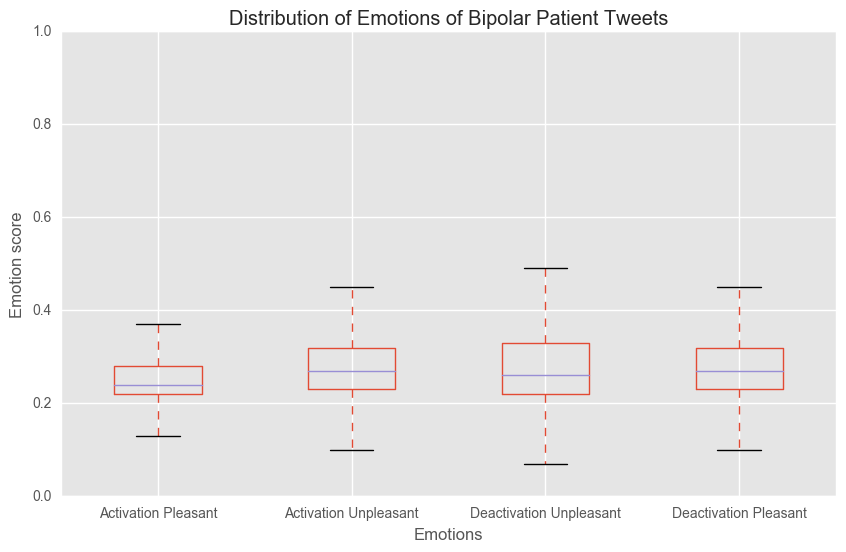

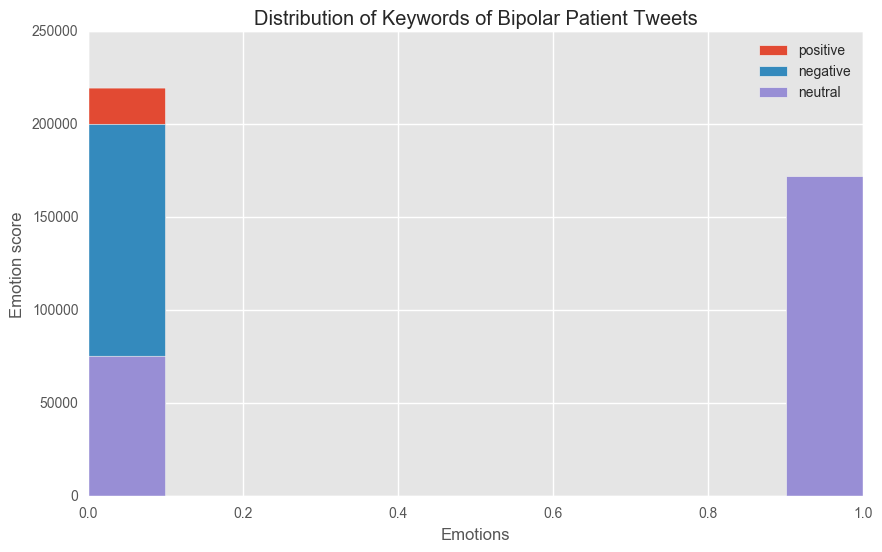

In [560]:
##################################################################################
# EXPLORE DISTRUBUTIONS OF EMOTION LABELLED DATA
###################################################################################
#data['Points'].value_counts().plot(ax=ax, kind='bar')
"""
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))
fig3, axs3 = plt.subplots(1,2,figsize=(15, 5))
fig4, axs4 = plt.subplots(1,2,figsize=(15, 5))
fig5, axs5 = plt.subplots(1,2,figsize=(15, 5))
fig6, axs6 = plt.subplots(1,2,figsize=(15, 5))
fig7, axs7 = plt.subplots(1,2,figsize=(15, 5))
fig8, axs8 = plt.subplots(1,2,figsize=(15, 5))
fig9, axs9 = plt.subplots(1,2,figsize=(15, 5))
"""
bipolar_emotions = keywordLabelled[['username','activation-pleasant','activation-unpleasant',
                 'deactivation-unpleasant','deactivation-pleasant']] 

sentiment_polarity = keywordLabelled[['positive','negative','neutral']]


kywords = keywordLabelled[['username','suicide-words',
                                      'depressive-symptoms', 'alcohol-abuse-words', 'hyper-active-symptoms',
                                      'religious-inspirations','medication-mentions','awareness-hashtags']]

features_to_explore = keywordLabelled[['username','location','tweetLat','tweetLong','tweetCreated','activation-pleasant','activation-unpleasant',
                 'deactivation-unpleasant','deactivation-pleasant','positive','negative','neutral','suicide-words',
                                      'depressive-symptoms', 'alcohol-abuse-words', 'hyper-active-symptoms',
                                      'religious-inspirations','medication-mentions','awareness-hashtags']]

#a1 = features_to_explore['activation-pleasant'].plot(kind = 'hist', title='Dist. of Activation Pleasant Scores for Bipolar Users', ax=axs[0])
#a2 = features_to_explore['activation-unpleasant'].plot(kind='hist', title='Dist. of Activation Unpleasant Scores for Bipolar Users', ax=axs[1])
#a3 = features_to_explore['deactivation-pleasant'].plot(kind='hist', title='Dist. of Deactivation Pleasant Scores for Bipolar Users', ax=axs2[0])
#a4 = features_to_explore['deactivation-unpleasant'].plot(kind='hist', title='Dist. of Deactivation Unpleasant Scores for Bipolar Users', ax=axs2[1])

#a5 = features_to_explore.positive.plot(kind = 'hist', title='Dist. of Positive scores for Bipolar Users', ax=axs3[0])
#a6 = features_to_explore.negative.plot(kind='hist', title='Dist. of Negative scores for Bipolar Users', ax=axs3[1])
#a7 = features_to_explore.neutral.plot(kind='hist', title='Dist. of Neutral scores for Bipolar Users', ax=axs4[0])

#a8 = features_to_explore['suicide-words'].plot(kind = 'hist', title='Dist. of Suicide Words for bipolar Users', ax=axs5[0])
#a9 = features_to_explore['depressive-symptoms'].plot(kind='hist', title='Dist. of Physical symptoms for bipolar Users', ax=axs5[1])
#a10 = features_to_explore['alcohol-abuse-words'].plot(kind='hist', title='Dist. of alcohol abuse for bipolar Users', ax=axs6[0])
#a11 = features_to_explore['hyper-active-symptoms'].plot(kind='hist', title='Dist. of hypomania words for bipolar Users', ax=axs6[1])

#a12 = features_to_explore['religious-inspirations'].plot(kind='hist', title='Dist. of religous words for bipolar Users', ax=axs7[0])
#a13 = features_to_explore['medication-mentions'].plot(kind='hist', title='Dist. of medications for bipolar Users', ax=axs7[1])
#a14 = features_to_explore['awareness-hashtags'].plot(kind='hist', title='Dist. of idf hashtags words for bipolar Users', ax=axs8[0])
#a15 = bipolar_emotions.plot(kind='hist', title='Dist. of emotions of all bipolar User tweets', ax=axs8[1])

#a16 = bipolar_emotions.plot(kind='box', title='Dist. of emotions of all bipolar User tweets', ax=axs9[0])
#a18 = scatter_matrix(bipolar_emotions, alpha=0.2, figsize=(6, 6), diagonal='kde')
#a19 = scatter_matrix(features_to_explore, alpha=0.2, figsize=(6, 6), diagonal='kde')

#EMOTIONS
a17 = bipolar_emotions.plot(kind='box', figsize=(10, 6), title='Distribution of Emotions of Bipolar Patient Tweets')
a17.set(xlabel='Emotions', ylabel='Emotion score')
a17.set_xticklabels(('Activation Pleasant', 'Activation Unpleasant','Deactivation Unpleasant','Deactivation Pleasant'))
#a18 = sentiment_polarity.plot(kind='box', title='Distribution of sentiment of all bipolar User tweets')


#KEYWORDS
a19 = sentiment_polarity.plot(kind='hist', figsize=(10, 6), title='Distribution of Keywords of Bipolar Patient Tweets')
a19.set(xlabel='Emotions', ylabel='Emotion score')
#a19.set_xticklabels(('Activation Pleasant', 'Activation Unpleasant','Deactivation Unpleasant','Deactivation Pleasant'))

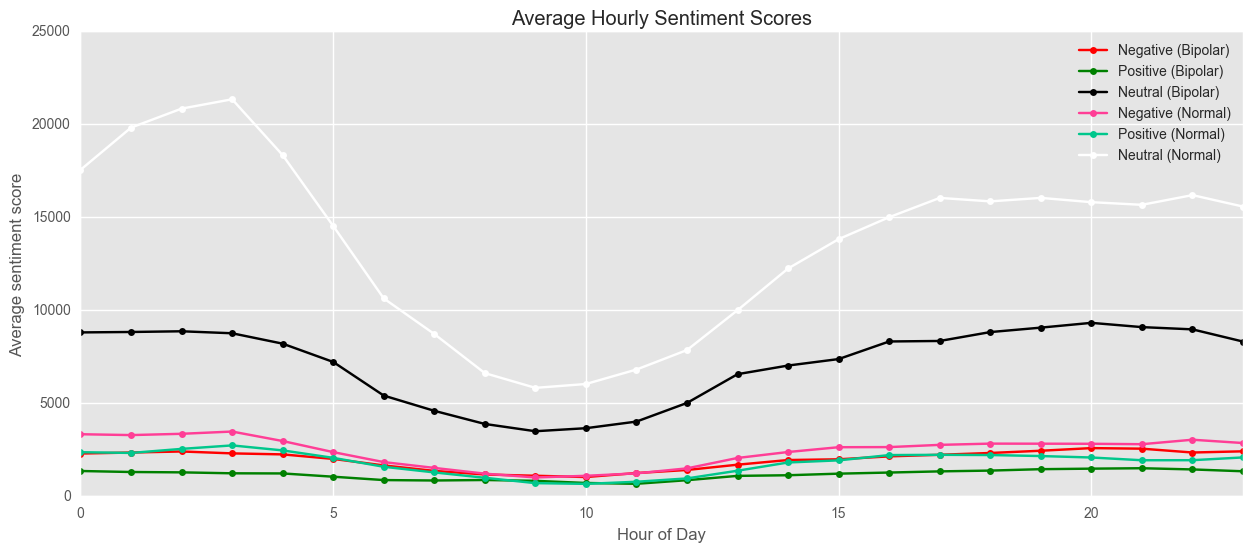

In [119]:
norml = normal_users[['negative','positive','neutral','tweetCreated','username']]
norml = norml.set_index('tweetCreated')
norml.index = pd.to_datetime(norml.index)
norml = norml.groupby(norml.index.hour).sum()
norml = norml.fillna(norml.bfill()) # currently filling with nearest non-null value

bipolar = keywordLabelled[['negative','positive','neutral','tweetCreated','username']]
bipolar = bipolar.set_index('tweetCreated')
bipolar.index = pd.to_datetime(bipolar.index)
bipolar = bipolar.groupby(bipolar.index.hour).sum()
bipolar = bipolar.fillna(bipolar.bfill()) # currently filling with nearest non-null value
#bipolar = norml.plot(figsize=(15, 6), color = ['red', 'green'], lw=2, marker='.', markersize=10, title='Average Hourly Sentiment Scores')
#bipolar.set(xlabel='Hour', ylabel='Average sentiment score')
#bipolar.set_axis_bgcolor('lightgray')

fig = plt.figure()
ax = fig.add_subplot(111)
b = bipolar.plot(kind='line', ax=ax, marker='.', markersize=10, color = ['red', 'green', 'black'])
b.set(xlabel='Hour of Day', ylabel='Average counts')
#b.legend(labels=['Negative (Bipolar)','Positive (Bipolar)'])
n = norml.plot(kind='line', ax=ax,  marker='.', markersize=10, figsize=(15, 6), color = ['#FF3E96', '#00C78C','white'], title="Average Hourly Sentiment Scores")
n.legend(labels=['Negative (Bipolar)','Positive (Bipolar)','Neutral (Bipolar)','Negative (Normal)','Positive (Normal)', 'Neutral (Normal)'])

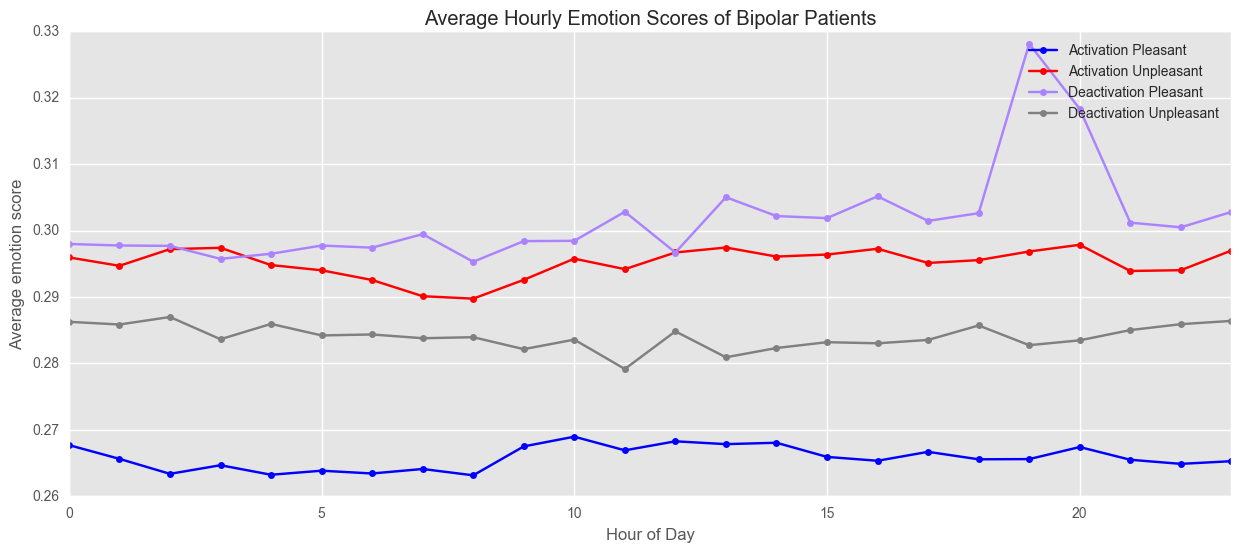

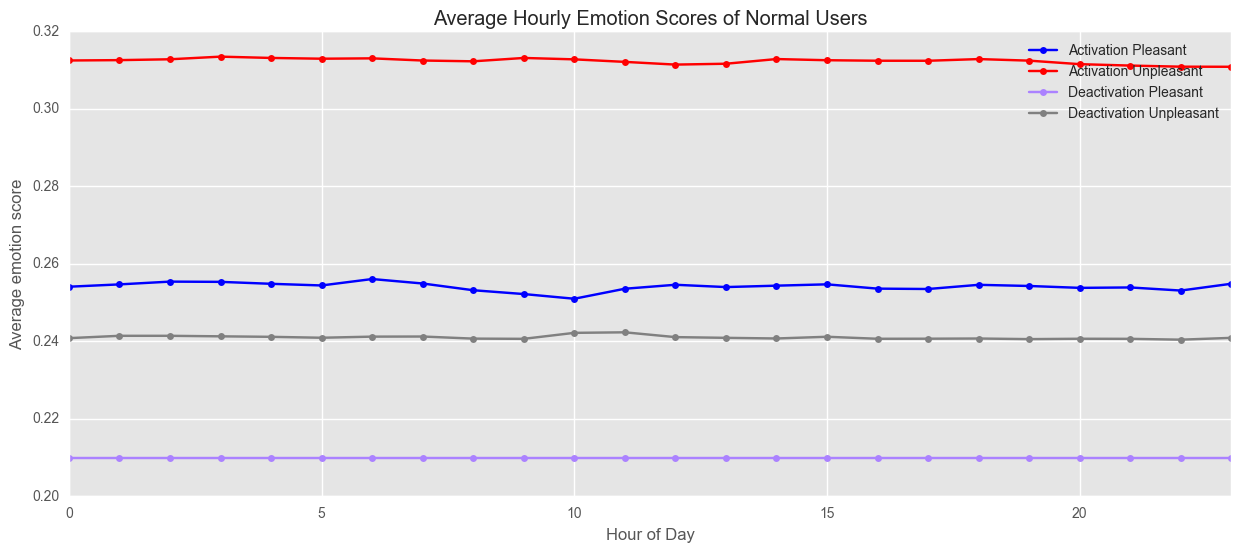

In [422]:
norml = normal_users[['activation-pleasant','activation-unpleasant',
                 'deactivation-pleasant','deactivation-unpleasant','tweetCreated','username']]
norml = norml.set_index('tweetCreated')
norml.index = pd.to_datetime(norml.index)
norml = norml.groupby(norml.index.hour).mean()
norml = norml.fillna(norml.bfill()) # currently filling with nearest non-null value

bipolar = keywordLabelled[['activation-pleasant','activation-unpleasant',
                 'deactivation-pleasant','deactivation-unpleasant','tweetCreated','username']]
bipolar = bipolar.set_index('tweetCreated')
bipolar.index = pd.to_datetime(bipolar.index)
bipolar = bipolar.groupby(bipolar.index.hour).mean()
bipolar = bipolar.fillna(bipolar.bfill()) # currently filling with nearest non-null value


fig = plt.figure()
ax = fig.add_subplot(111)
b = bipolar.plot(kind='line', ax=ax,color = ['blue', 'red', '#AB82FF','gray'], marker='.', markersize=10, figsize=(15, 6),title="Average Hourly Emotion Scores of Bipolar Patients")
b.set(xlabel='Hour of Day', ylabel='Average emotion score')
b.legend(labels=['Activation Pleasant','Activation Unpleasant','Deactivation Pleasant','Deactivation Unpleasant'])
n = norml.plot(kind='line', color = ['blue', 'red', '#AB82FF','gray'],  marker='.', markersize=10, figsize=(15, 6), title="Average Hourly Emotion Scores of Normal Users")
n.set(xlabel='Hour of Day', ylabel='Average emotion score')
n.legend(labels=['Activation Pleasant','Activation Unpleasant','Deactivation Pleasant','Deactivation Unpleasant'])

[<matplotlib.text.Text at 0xc58f7f98>, <matplotlib.text.Text at 0x9f390cc0>]

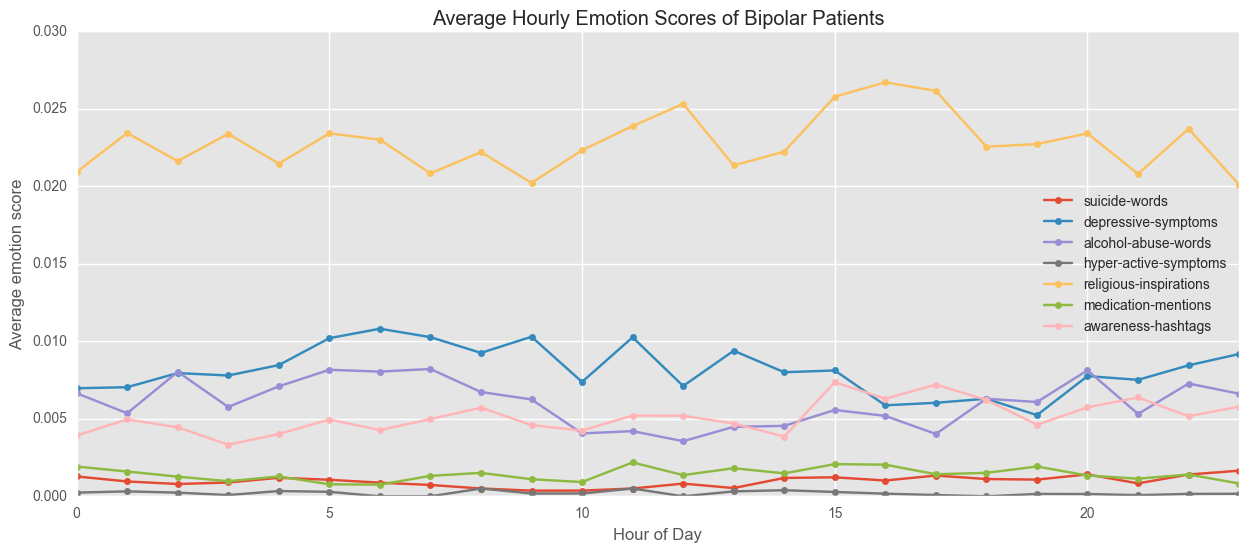

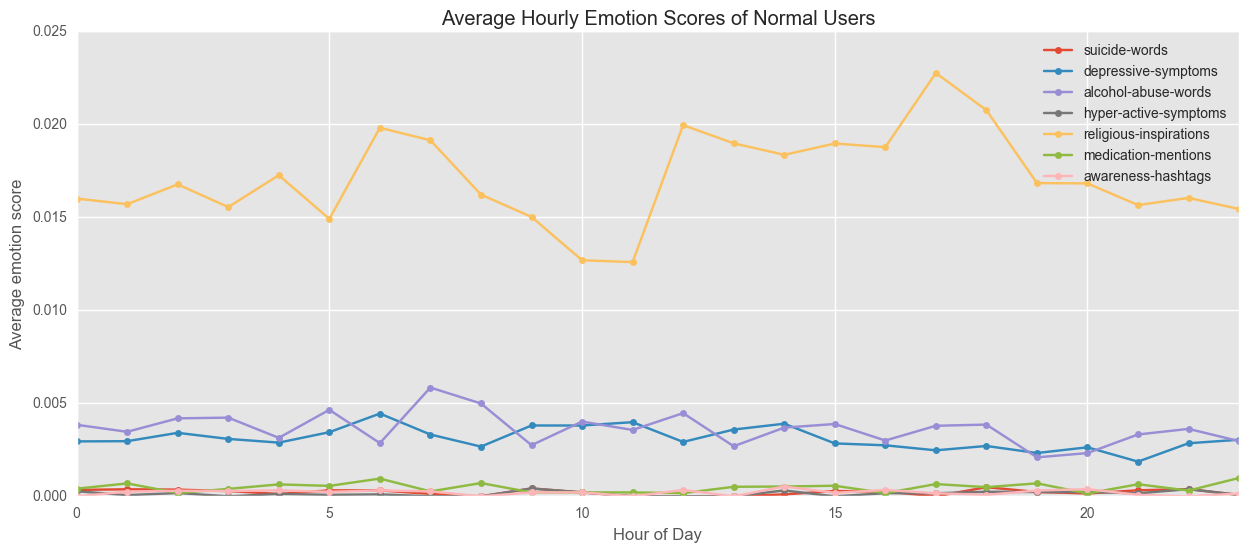

In [135]:
norml = normal_users[['suicide-words','depressive-symptoms', 'alcohol-abuse-words', 'hyper-active-symptoms',
                      'religious-inspirations','medication-mentions','awareness-hashtags','tweetCreated','username']]
norml = norml.set_index('tweetCreated')
norml.index = pd.to_datetime(norml.index)
norml = norml.groupby(norml.index.hour).mean()
norml = norml.fillna(norml.bfill()) # currently filling with nearest non-null value

bipolar = keywordLabelled[['suicide-words','depressive-symptoms', 'alcohol-abuse-words', 'hyper-active-symptoms',
                      'religious-inspirations','medication-mentions','awareness-hashtags','tweetCreated','username']]
bipolar = bipolar.set_index('tweetCreated')
bipolar.index = pd.to_datetime(bipolar.index)
bipolar = bipolar.groupby(bipolar.index.hour).mean()
bipolar = bipolar.fillna(bipolar.bfill()) # currently filling with nearest non-null value


fig = plt.figure()
ax = fig.add_subplot(111)
b = bipolar.plot(kind='line', ax=ax, marker='.', markersize=10, figsize=(15, 6),title="Average Hourly Emotion Scores of Bipolar Patients")
b.set(xlabel='Hour of Day', ylabel='Average emotion score')
#b.legend(labels=['Activation Pleasant','Activation Unpleasant','Deactivation Pleasant','Deactivation Unpleasant'])
n = norml.plot(kind='line',  marker='.', markersize=10, figsize=(15, 6), title="Average Hourly Emotion Scores of Normal Users")
n.set(xlabel='Hour of Day', ylabel='Average emotion score')
#n.legend(labels=['Activation Pleasant','Activation Unpleasant','Deactivation Pleasant','Deactivation Unpleasant'])

In [87]:
# FOR EACH USER, EXPLORE AVERAGE SCORES
###################################################################################
# Apply np.mean to the ages column and np.sum to the payments.

missing = fields.groupby('username').apply(lambda x: x.isnull().sum())
keywordLabelled.isnull().sum()

agg_funcs = {'ACTIVATION_PLEASANT': np.max, 'ACTIVATION_UNPLEASANT': np.max, 'DEACTIVATION_UNPLEASANT': np.mean, 'DEACTIVATION_UNPLEASANT': np.max}

data = keywordLabelled[['username','tweetCreated','ACTIVATION_PLEASANT','ACTIVATION_UNPLEASANT',
                 'DEACTIVATION_UNPLEASANT',
                 'DEACTIVATION_PLEASANT']] 

def test(grp):
    return {np.mean(grp['DEACTIVATION_UNPLEASANT'] > .5)}
# Groupby each individual month and then apply the funcs in agg_funcs
d = data.reset_index().set_index('tweetCreated')
d.index = pd.to_datetime(d.index)
grouped = d.groupby('username').resample('2W').apply(test)
#{'ACTIVATION_PLEASANT': sum(ACTIVATION_PLEASANT > 40), 'ACTIVATION_UNPLEASANT': np.max, 'DEACTIVATION_UNPLEASANT': np.max, 'DEACTIVATION_UNPLEASANT': np.max}
grouped

NameError: name 'fields' is not defined

In [6]:
##################################################################################
# Split user data, create CSV for every user to do analysis by user
###################################################################################
def userstoCSV(df):
    df.to_csv(user_list + df.name +'.csv', index = False)
    print df.name

keywordLabelled.groupby('username').apply(userstoCSV)


50ShadesOfThisD
AmberNicole1205
AmiElzbth
AmyClareFrancis
AtlantaHeiress
AwesomeAsh
BiPoHeather
BrianCrimson
BrittanyElizab8
CUAA1928
CanadianKindon
ChrisStrei
ColdHeartNoLove
CountMatthula
CrippleTheBitch
DarrenFiander
DawnTrundle
Ellenskis
EveOCative
FiltnessSue
GeorgeHunter_
GeorgeWigen
Glennspillman
HalanaCapitanio
Heather_fob
JainaRenee
JaleesaJCollins
KateWynne1
KingGas100
Linton93
LorrieArianna
LostKaiyna
MCurtis5220
MRSAXXMANN
Margarita5Bar9
MaxwellVautour
MissShastaOwen
MjaBradshaw
Oello12
OfMiceAndManda1
Patricks_Mommii
PieceOfRia
Radica_XO_Khidd
Real_Maximilian
Rs668000
SinVenus
Star7Yang
Taashieee_
ThatKristaGirl
TheRoyalBentley
WowMarissa
_MeggKNOgood
_MelisaMarie
_fuckenjoibear
_gaaaaaaaaaaaby
alhoover81
aliumph
amirmoslim
ayelici
badkidvictoria
bblaired
beebesharkey
bvb1123
cass4504
christ_halley
cvbbm14
damaster_88
darthbender
ecox42016
edlukethird
embalmist99
gnewfry
haliemcarter
iKeep_Going
jenphoenix83
jimmypiper2
karlzz19
katiplease
louisep1982
luvthosebritmen
maria

""


In [179]:
##################################################################################
# TIME SERIES ANALYSIS
# REFERENCES:
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3#step-2-—-loading-time-series-data
###################################################################################
USERNAME = 'AmiElzbth'
USER_DETAILS = user_details
USER = pd.read_csv(user_list + USERNAME +'.csv') # load final user list records with diagnosis date
USER = USER.reset_index().set_index('tweetCreated')
USER.index = pd.to_datetime(USER.index)
USER = USER[['activation-pleasant','activation-unpleasant',
                 'deactivation-unpleasant','positive', 'negative','neutral',
                 'deactivation-pleasant','awareness-hashtags', 'suicide-words', 'depressive-symptoms','religious-inspirations','medication-mentions', 'alcohol-abuse-words','hyper-active-symptoms']]
#print USER.index.unique()

30    Mar-11-2015
Name: diagnosisDate, dtype: object
30    "@pattyduke_id You are one my heroes in regards to living with Bipolar Disorder. I was diagnosed in 2002 and your book inspired me to live."
Name: diagstatement, dtype: object


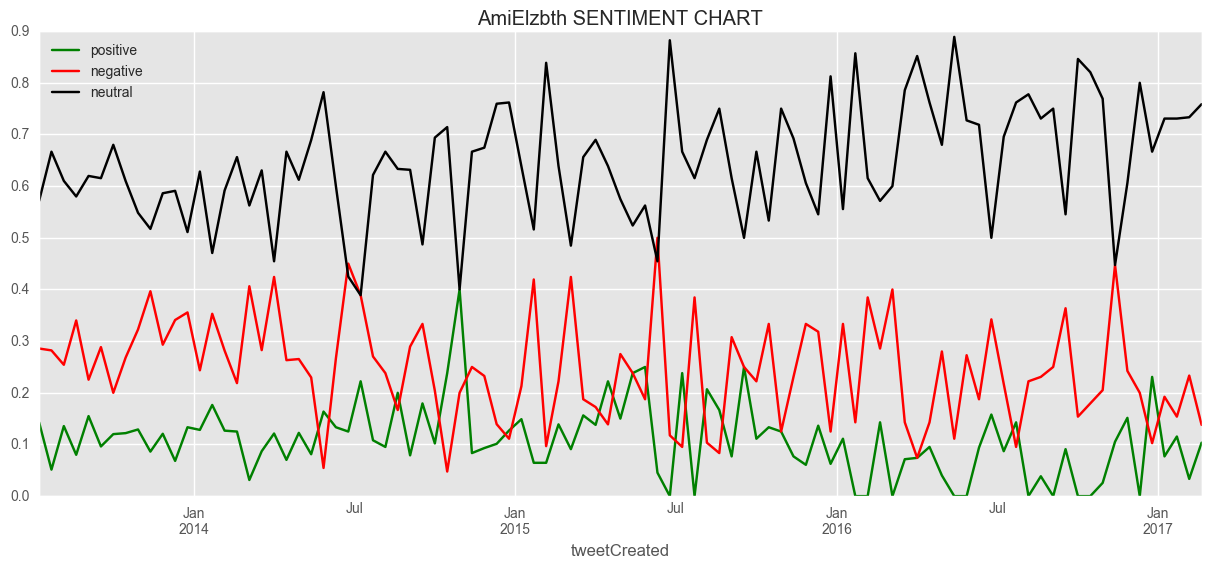

In [180]:
#USER.index = pd.to_datetime(USER.index)
USERSENTIMENT = USER[['positive', 'negative', 'neutral']] #  'positive', 'negative', 'neutral'

USERSENTIMENT = USERSENTIMENT.resample('2W').mean()
USERSENTIMENT = USERSENTIMENT.fillna(USEREMOTIONS.bfill()) # currently filling with nearest non-null value
USERSENTIMENT.plot(figsize=(15, 6), color = ['green', 'red', 'black'], title = USERNAME + ' SENTIMENT CHART')

found_USER_RECORD = USER_DETAILS.loc[USER_DETAILS['username'] == USERNAME]
print pd.to_datetime(found_USER_RECORD['diagnosisDate']).dt.strftime('%b-%d-%Y')
print found_USER_RECORD['diagstatement']

30    Mar-11-2015
Name: diagnosisDate, dtype: object
30    "@pattyduke_id You are one my heroes in regards to living with Bipolar Disorder. I was diagnosed in 2002 and your book inspired me to live."
Name: diagstatement, dtype: object


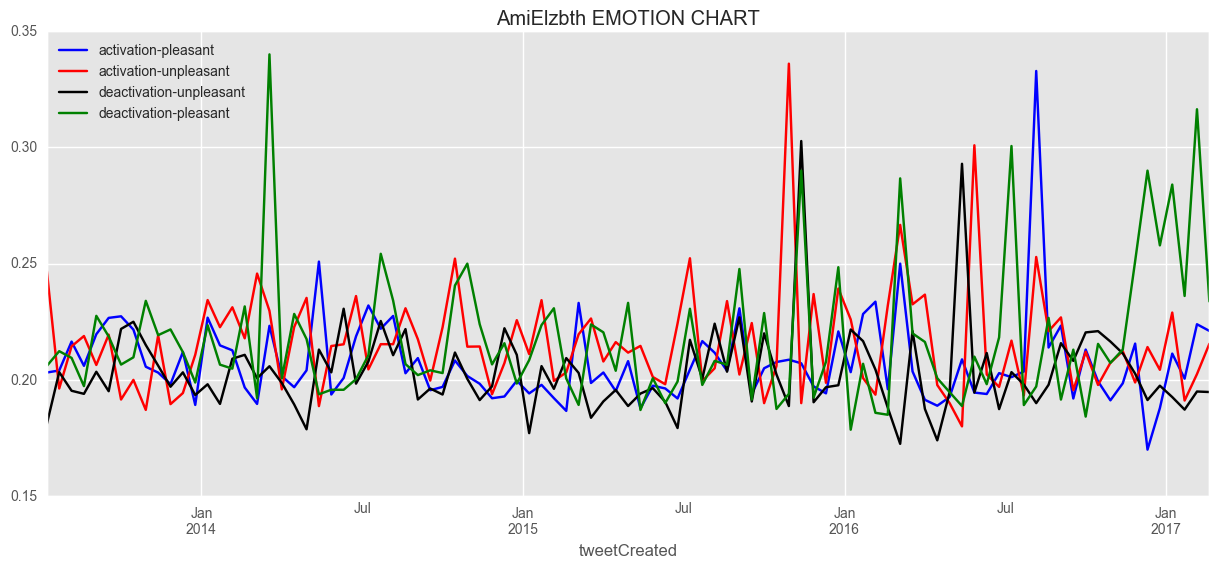

In [181]:
#USER.index = pd.to_datetime(USER.index)
USEREMOTIONS = USER[['activation-pleasant','activation-unpleasant',
                 'deactivation-unpleasant',
                 'deactivation-pleasant']] #  'positive', 'negative', 'neutral'

USEREMOTIONS = USEREMOTIONS.resample('2W').mean()
USEREMOTIONS = USEREMOTIONS.fillna(USEREMOTIONS.bfill()) # currently filling with nearest non-null value
USEREMOTIONS.plot(figsize=(15, 6), color = ['blue', 'red', 'black', 'green'], title = USERNAME + ' EMOTION CHART')

found_USER_RECORD = USER_DETAILS.loc[USER_DETAILS['username'] == USERNAME]
print pd.to_datetime(found_USER_RECORD['diagnosisDate']).dt.strftime('%b-%d-%Y')
print found_USER_RECORD['diagstatement']
#plt.show()

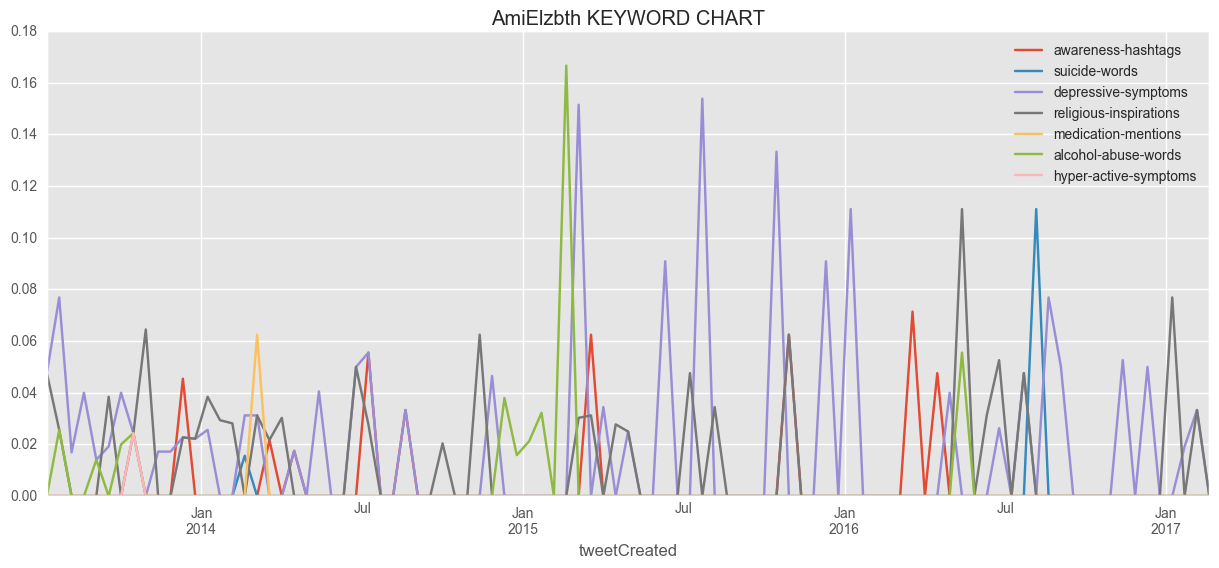

In [149]:
USERKEYWORDS = USER[['awareness-hashtags', 'suicide-words', 'depressive-symptoms','religious-inspirations','medication-mentions', 'alcohol-abuse-words','hyper-active-symptoms']]
USERKEYWORDS = USERKEYWORDS.resample('2W').mean()
USERKEYWORDS.plot(figsize=(15, 6), title = USERNAME + ' KEYWORD CHART')
#plt.show()

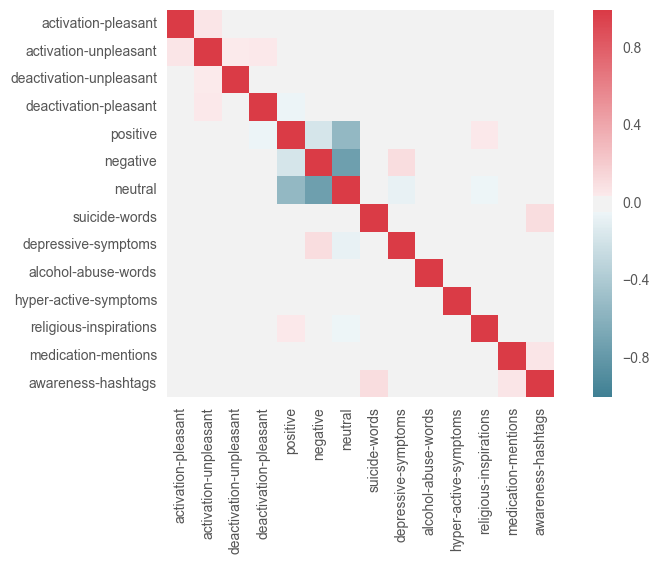

In [151]:
##################################################################################
# FINDING CORRELATIONS BETWEEN FEATURES
# http://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
###################################################################################
#print USER.resample('2W').mean().corr(method='pearson')['alcohol_abuse_words_matched']
#similarity = rbf_kernel(data.values.reshape(-1, 1), gamma=1.) # Try different values of gamma
#pd.scatter_matrix(USER, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
f, ax = plt.subplots(figsize=(10,5))
corr = features_to_explore.corr()
#sns.pairplot(dataframe)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [120]:
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(USER['DEACTIVATION_UNPLEASANT'], model='additive')
fig = decomposition.plot()
plt.show()

ValueError: This function does not handle missing values

In [523]:
### DEPRESSIVE MOOD TEMPORAL ANALYSIS - EMOTIONS

explore_episodes = features_to_explore[['username','tweetCreated','negative','positive','suicide-words',
                                      'depressive-symptoms','medication-mentions','awareness-hashtags','deactivation-unpleasant',
                                       'deactivation-pleasant','activation-unpleasant']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('2W',how={'depressive-symptoms':'sum','suicide-words':'sum','deactivation-unpleasant':'mean'}))
explore_episodes = explore_episodes.reset_index()

#define depressive episode as having atleast 5 negative tweets and 1 depressive symptom mention within a period of 2 weeks
threshold = .3

explore_depressive_episodes = explore_episodes.loc[(explore_episodes['deactivation-unpleasant'] > threshold) & (explore_episodes['suicide-words'] > 1)]# & (explore_episodes['awareness-hashtags'] > 1)
#explore_depressive_episodes.head(5)

print 'Number of bipolar patients:' + str(len(explore_episodes.groupby('username')))
explore_depressive_episodes = explore_depressive_episodes.groupby('username').count()
print 'Bipolar patients with depressive episodes:' + str(len(explore_depressive_episodes))
explore_depressive_episodes

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)



Number of bipolar patients:95
Bipolar patients with depressive episodes:2


,tweetCreated,suicide-words,deactivation-unpleasant,depressive-symptoms
username,,,,
bblaired,1,1,1,1
jimmypiper2,1,1,1,1


In [541]:
### HYPOMANIC EPISODE TEMPORAL ANALYSIS - SENTIMENT

explore_episodes = features_to_explore[['username','tweetCreated','negative','positive','hyper-active-symptoms',
                                      'religious-inspirations','medication-mentions','awareness-hashtags','alcohol-abuse-words']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('4D',how={'positive':'sum','awareness-hashtags':'sum','medication-mentions':'sum','hyper-active-symptoms':'sum','religious-inspirations':'sum'}))
explore_episodes = explore_episodes.reset_index()

#define depressive episode as having atleast 5 negative tweets and 1 depressive symptom mention within a period of 2 weeks
threshold = 10

explore_depressive_episodes = explore_episodes.loc[(explore_episodes['positive'] > threshold) & (explore_episodes['awareness-hashtags'] > 1)]# & (explore_episodes['awareness-hashtags'] > 1)
#explore_depressive_episodes.head(5)

print 'Number of bipolar patients:' + str(len(explore_episodes.groupby('username')))
explore_depressive_episodes = explore_depressive_episodes.groupby('username').count()
print 'Bipolar patients with hypomanic episodes:' + str(len(explore_depressive_episodes))
print 'avg:' + str(explore_depressive_episodes['positive'].mean())
print 'std:' + str(explore_depressive_episodes['positive'].std())
explore_depressive_episodes

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)



Number of bipolar patients:95
Bipolar patients with hypomanic episodes:18
avg:1.83333333333
std:1.09812674721


,tweetCreated,positive,hyper-active-symptoms,medication-mentions,religious-inspirations,awareness-hashtags
username,,,,,,
AtlantaHeiress,4,4,4,4,4,4
BiPoHeather,1,1,1,1,1,1
BrianCrimson,1,1,1,1,1,1
DawnTrundle,1,1,1,1,1,1
Glennspillman,3,3,3,3,3,3
MissShastaOwen,1,1,1,1,1,1
Oello12,1,1,1,1,1,1
Rs668000,1,1,1,1,1,1
alhoover81,2,2,2,2,2,2


In [558]:
### HYPOMANIC EPISODE TEMPORAL ANALYSIS - EMOTIONS

explore_episodes = features_to_explore[['username','tweetCreated','negative','positive','hyper-active-symptoms',
                                      'religious-inspirations','medication-mentions','awareness-hashtags','alcohol-abuse-words','deactivation-unpleasant',
                                       'deactivation-pleasant','activation-pleasant']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('4D',how={'religious-inspirations':'sum','activation-pleasant':'mean'}))
explore_episodes = explore_episodes.reset_index()

#define depressive episode as having atleast 5 negative tweets and 1 depressive symptom mention within a period of 2 weeks
threshold = .45

explore_depressive_episodes = explore_episodes.loc[(explore_episodes['activation-pleasant'] > threshold)]# & (explore_episodes['awareness-hashtags'] > 1)
#explore_depressive_episodes.head(5)

print 'Number of bipolar patients:' + str(len(explore_episodes.groupby('username')))
explore_depressive_episodes = explore_depressive_episodes.groupby('username').count()
print 'Bipolar patients with depressive episodes:' + str(len(explore_depressive_episodes))
explore_depressive_episodes

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)



Number of bipolar patients:95
Bipolar patients with depressive episodes:66


,tweetCreated,activation-pleasant,religious-inspirations
username,,,
50ShadesOfThisD,1,1,1
AmberNicole1205,3,3,3
AmiElzbth,2,2,2
AmyClareFrancis,4,4,4
AwesomeAsh,6,6,6
BiPoHeather,2,2,2
BrittanyElizab8,1,1,1
CUAA1928,1,1,1
CanadianKindon,1,1,1


In [448]:
### DEPRESSIVE MOOD TEMPORAL ANALYSIS - EMOTIONS

explore_episodes = features_to_explore[['username','tweetCreated','negative','positive','suicide-words',
                                      'depressive-symptoms','medication-mentions','awareness-hashtags','deactivation-unpleasant',
                                       'deactivation-pleasant','activation-unpleasant']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('2W',how={'depressive-symptoms':'sum','suicide-words':'sum','deactivation-unpleasant':'mean'}))
explore_episodes = explore_episodes.reset_index()

#define depressive episode as having atleast 5 negative tweets and 1 depressive symptom mention within a period of 2 weeks
threshold = .3

explore_depressive_episodes = explore_episodes.loc[(explore_episodes['deactivation-unpleasant'] > threshold) & (explore_episodes['suicide-words'] > 1)]# & (explore_episodes['awareness-hashtags'] > 1)
#explore_depressive_episodes.head(5)

print 'Number of bipolar patients:' + str(len(explore_episodes.groupby('username')))
explore_depressive_episodes = explore_depressive_episodes.groupby('username').count()
print 'Bipolar patients with depressive episodes:' + str(len(explore_depressive_episodes))
explore_depressive_episodes

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)



Number of bipolar patients:95
Bipolar patients with depressive episodes:2


,tweetCreated,suicide-words,deactivation-unpleasant,depressive-symptoms
username,,,,
bblaired,1,1,1,1
jimmypiper2,1,1,1,1


In [495]:
### DEPRESSIVE MOOD TEMPORAL ANALYSIS - SENTIMENT

explore_episodes = features_to_explore[['username','tweetCreated','negative','positive','suicide-words',
                                      'depressive-symptoms','medication-mentions','awareness-hashtags']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('2W',how='sum'))
explore_episodes = explore_episodes.reset_index()

#define depressive episode as having atleast 5 negative tweets and 1 depressive symptom mention within a period of 2 weeks
threshold = 10

explore_depressive_episodes = explore_episodes.loc[(explore_episodes['negative'] > threshold) & (explore_episodes['suicide-words'] > 1)]
#explore_depressive_episodes.head(5)]# & (explore_episodes['awareness-hashtags'] > 1)
#explore_depressive_episodes.head(5)

print 'Number of bipolar patients:' + str(len(explore_episodes.groupby('username')))
explore_depressive_episodes = explore_depressive_episodes.groupby('username').count()
print 'Bipolar patients with depressive episodes:' + str(len(explore_depressive_episodes))
print 'avg:' + str(explore_depressive_episodes['negative'].mean())
print 'std:' + str(explore_depressive_episodes['negative'].std())
explore_depressive_episodes

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



Number of bipolar patients:95
Bipolar patients with depressive episodes:15
avg:1.33333333333
std:0.816496580928


,tweetCreated,negative,positive,suicide-words,depressive-symptoms,medication-mentions,awareness-hashtags
username,,,,,,,
50ShadesOfThisD,2,2,2,2,2,2,2
CrippleTheBitch,2,2,2,2,2,2,2
Glennspillman,4,4,4,4,4,4,4
Linton93,1,1,1,1,1,1,1
Margarita5Bar9,1,1,1,1,1,1,1
Radica_XO_Khidd,1,1,1,1,1,1,1
bvb1123,1,1,1,1,1,1,1
gnewfry,1,1,1,1,1,1,1
jimmypiper2,1,1,1,1,1,1,1


In [299]:
### DAILY DEPRESSIVE MOOD
# how many 1 hour periods have more than 5 negative tweets

explore_episodes = features_to_explore[['username','tweetCreated','negative','positive','suicide-words',
                                      'depressive-symptoms','medication-mentions','awareness-hashtags']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('1H',how='sum'))
explore_episodes = explore_episodes.reset_index()

explore_depressive_episodes_hrly = explore_episodes.loc[explore_episodes['negative'] > 5]

explore_episodes2 = explore_depressive_episodes_hrly.set_index('tweetCreated')
explore_episodes2 = explore_episodes2.groupby('username').apply(
    lambda explore_episodes2: explore_episodes2.resample('1D',how='sum')) # for each day count that there are atleast 5 hours with 5 negative tweets
# for each day sum the values for hours with over 5 negative tweets
explore_episodes2 = explore_episodes2.reset_index()

#explore_depressive_episodes_daily = explore_episodes2.loc[explore_episodes['negative'] > 5]

explore_depressive_episodes_daily =  explore_episodes2.set_index('tweetCreated')
explore_depressive_episodes_daily = explore_depressive_episodes_daily.groupby('username').apply(
    lambda explore_depressive_episodes_daily: explore_depressive_episodes_daily.resample('2W',how='sum'))

print 'Number of bipolar patients:' + str(len(explore_episodes.groupby('username')))
explore_depressive_episodes_daily = explore_depressive_episodes_daily.reset_index()
final = explore_depressive_episodes_daily.groupby('username')['negative'].count()  
print 'Bipolar patients with depressive episodes:' + str(len(final))
final
#.loc[explore_episodes2['negative'] > 3]
#explore_episodes2.grouby('username')

# hw many 2 week periods had days where there were more than 5 negative tweets in an hour?

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



Number of bipolar patients:95
Bipolar patients with depressive episodes:63


username
50ShadesOfThisD     4
AmberNicole1205     7
AmyClareFrancis     1
AtlantaHeiress     12
BiPoHeather         2
BrianCrimson        1
BrittanyElizab8     1
ColdHeartNoLove     3
CrippleTheBitch     9
Ellenskis           1
EveOCative          6
GeorgeHunter_       1
Glennspillman       3
Heather_fob         2
JainaRenee         10
JaleesaJCollins    13
KingGas100          1
LorrieArianna       4
MRSAXXMANN          1
Margarita5Bar9      5
MaxwellVautour      3
MjaBradshaw         1
Oello12             5
OfMiceAndManda1     3
Patricks_Mommii     2
PieceOfRia          1
Radica_XO_Khidd     5
Real_Maximilian     4
Rs668000            2
SinVenus            2
Taashieee_         10
ThatKristaGirl      1
WowMarissa          6
_MeggKNOgood        1
_MelisaMarie        7
_fuckenjoibear     14
alhoover81          5
ayelici             5
beebesharkey        1
bvb1123             6
christ_halley       1
cvbbm14             5
darthbender         1
ecox42016           4
gnewfry             2
h

In [572]:
### HYPOMANIC MOOD MOST OF DAY ATTEMPT 2 - WORKING
# how many 1 hour periods have more than 5 negative tweets

# TRY WITH EMOTION TOO deactivation-unpleasant
explore_episodes = features_to_explore[['username','tweetCreated','negative','positive','suicide-words',
                                      'depressive-symptoms','medication-mentions','awareness-hashtags']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('1D',how={'positive':'sum'})) # sum negative tweets per hour
explore_episodes = explore_episodes.loc[explore_episodes['positive'] > 5] # keep only days with over 10 negative tweets in that day
explore_episodes = explore_episodes.reset_index(level=[0, 1]).set_index('tweetCreated')


explore_episodes2 = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('4D', how={'positive':'count'})) # count hours in a day with over 5 neg tweets
explore_episodes2 = explore_episodes2.reset_index(level=[0, 1]).set_index('tweetCreated')
explore_episodes2 = explore_episodes2.loc[explore_episodes2['positive'] > 2] # over 5 days

"""
explore_episodes2 = explore_episodes2.loc[explore_episodes2['negative'] > 10] # filter days with over 

explore_episodes3 = explore_episodes2.groupby('username').apply(
    lambda explore_episodes2: explore_episodes2.resample('2W', how={'negative':'count'})) # count days within 2 week period that match criteria above
#explore_episodes2 = explore_episodes2.reset_index(level=[0, 1]).set_index('tweetCreated')
"""

final = explore_episodes2.groupby('username').count()  
print 'Bipolar patients with hypomanic episodes:' + str(len(final))
final

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)



Bipolar patients with hypomanic episodes:11


C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)



,positive
username,
AtlantaHeiress,2
CUAA1928,4
OfMiceAndManda1,4
Rs668000,2
ayelici,1
beebesharkey,1
bvb1123,4
rojaskillsit,1
ryanrkips23,1


In [571]:
### DEPRESSIVE MOOD MOST OF DAY ATTEMPT 2 - WORKING
# how many 1 hour periods have more than 5 negative tweets

# TRY WITH EMOTION TOO deactivation-unpleasant
explore_episodes = features_to_explore[['username','tweetCreated','negative','positive','suicide-words',
                                      'depressive-symptoms','medication-mentions','awareness-hashtags']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('1D',how={'negative':'sum'})) # sum negative tweets per hour
explore_episodes = explore_episodes.loc[explore_episodes['negative'] > 2] # keep only days with over 10 negative tweets in that day
explore_episodes = explore_episodes.reset_index(level=[0, 1]).set_index('tweetCreated')


explore_episodes2 = explore_episodes.groupby('username').apply(
    lambda explore_episodes: explore_episodes.resample('2W', how={'negative':'count'})) # count hours in a day with over 5 neg tweets
explore_episodes2 = explore_episodes2.reset_index(level=[0, 1]).set_index('tweetCreated')
explore_episodes2 = explore_episodes2.loc[explore_episodes2['negative'] > 5] # over 5 days

"""
explore_episodes2 = explore_episodes2.loc[explore_episodes2['negative'] > 10] # filter days with over 

explore_episodes3 = explore_episodes2.groupby('username').apply(
    lambda explore_episodes2: explore_episodes2.resample('2W', how={'negative':'count'})) # count days within 2 week period that match criteria above
#explore_episodes2 = explore_episodes2.reset_index(level=[0, 1]).set_index('tweetCreated')
"""

final = explore_episodes2.groupby('username').count()  
print 'Bipolar patients with depressive episodes:' + str(len(final))
final

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)



Bipolar patients with depressive episodes:53


,negative
username,
50ShadesOfThisD,5
AmberNicole1205,6
AtlantaHeiress,4
BrittanyElizab8,5
CUAA1928,1
CanadianKindon,3
ColdHeartNoLove,2
CrippleTheBitch,9
EveOCative,1


In [580]:
#SPATIAL ANALYSIS of DEPRESSIVE MOOD WITHOUT RESPECT TO TIME
#group by location and time
# set threshold
#for every user's locations, group time periods and check for threshold

feature = 'deactivation-unpleasant'
threshold = .3

explore_episodes = features_to_explore[['username','tweetCreated','location','negative','positive','suicide-words',
                                      'depressive-symptoms','medication-mentions','awareness-hashtags','deactivation-unpleasant']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby(['username','location'])[feature].mean()
#.apply(
   # lambda explore_episodes: explore_episodes.resample('2W', how={'negative':'sum'}))
explore_episodes = explore_episodes.reset_index()

#define depressive episode as having atleast 5 negative tweets and 1 depressive symptom mention within a period of 2 weeks


explore_depressive_episodes = explore_episodes.loc[(explore_episodes[feature] > threshold)]# & (explore_episodes['awareness-hashtags'] > 1)
#explore_depressive_episodes.head(5)

#print 'Number of bipolar patients:' + str(len(explore_episodes.groupby('username')))
explore_depressive_episodes = explore_depressive_episodes.groupby('username').location.nunique()   #groupby(['username','location']).count()
#print 'Bipolar patients with depressive episodes:' + str(len(explore_depressive_episodes))
print 'Bipolar patients with depressive episodes:' + str(len(explore_depressive_episodes))
explore_depressive_episodes#[explore_depressive_episodes['username'] == '50ShadesOfThisD'] 

# for each user, find locations where there were 2 week periods with high negative
# how many locations have had 2 week periods with over 5 negative tweets? Do locations change? 

Bipolar patients with depressive episodes:93


username
50ShadesOfThisD    113
AmberNicole1205     97
AmiElzbth           65
AmyClareFrancis     38
AtlantaHeiress     154
AwesomeAsh          22
BiPoHeather         24
BrianCrimson       125
BrittanyElizab8    150
CUAA1928            71
CanadianKindon      47
ChrisStrei          56
ColdHeartNoLove    330
CountMatthula       41
CrippleTheBitch     45
DarrenFiander       33
DawnTrundle         30
Ellenskis           22
EveOCative          46
FiltnessSue         30
GeorgeHunter_      201
GeorgeWigen         23
Glennspillman       28
HalanaCapitanio     60
Heather_fob         72
JainaRenee          41
JaleesaJCollins    378
KateWynne1         272
KingGas100          56
Linton93           182
LorrieArianna       34
LostKaiyna          45
MCurtis5220          5
MRSAXXMANN          37
Margarita5Bar9     449
MaxwellVautour     192
MissShastaOwen      32
MjaBradshaw         37
Oello12             39
OfMiceAndManda1    254
Patricks_Mommii    155
PieceOfRia          14
Radica_XO_Khidd     39
Re

In [ ]:
#SPATIAL ANALYSIS of DEPRESSIVE MOOD WITH RESPECT TO TIME
#group by location and time
# set threshold
#for every user's locations, group time periods and check for threshold

feature = 'negative'
threshold = 10
action = 'sum'

explore_episodes = features_to_explore[['username','tweetCreated','location','negative','positive','suicide-words',
                                      'depressive-symptoms','medication-mentions','awareness-hashtags']]

explore_episodes = explore_episodes.set_index('tweetCreated')# reset_index
explore_episodes.index = pd.to_datetime(explore_episodes.index)
explore_episodes = explore_episodes.groupby(['username','location']).apply(
    lambda explore_episodes: explore_episodes.resample('2W', how={feature:action,'awareness-hashtags':'sum'}))
explore_episodes = explore_episodes.reset_index()

#define depressive episode as having atleast 5 negative tweets and 1 depressive symptom mention within a period of 2 weeks


explore_depressive_episodes = explore_episodes.loc[(explore_episodes[feature] > threshold) & (explore_episodes['awareness-hashtags'] > 1)]# & (explore_episodes['awareness-hashtags'] > 1)
#explore_depressive_episodes.head(5)

#print 'Number of bipolar patients:' + str(len(explore_episodes.groupby('username')))
explore_depressive_episodes = explore_depressive_episodes.groupby('username').location.nunique()   #groupby(['username','location']).count()
#print 'Bipolar patients with depressive episodes:' + str(len(explore_depressive_episodes))
print 'Bipolar patients with depressive episodes:' + str(len(explore_depressive_episodes))
explore_depressive_episodes#[explore_depressive_episodes['username'] == '50ShadesOfThisD'] 

# for each user, find locations where there were 2 week periods with high negative
# how many locations have had 2 week periods with over 5 negative tweets? Do locations change? 

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)



In [184]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=2,init='k-means++',random_state=0)

#data_to_frame = data_to_frame[data_to_frame['postId'] != 3913]
format_for_clustering_users = format_for_clustering_users.fillna(0)
good_columns = format_for_clustering_users[['positive','negative','neutral']]#,'DEACTIVATION_PLEASANT','ACTIVATION_UNPLEASANT','DEACTIVATION_UNPLEASANT'

# Fit the model using the good columns.
kmeans_model.fit_predict(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_
data2D = kmeans_model.transform(good_columns)

tweets_clustered = format_for_clustering_users.copy()
tweets_clustered['Cluster_Class'] = pd.Series(labels, index=tweets_clustered.index)

r = tweets_clustered.groupby(['username','Cluster_Class']).agg({'username':np.size}) #, 'DEACTIVATION_PLEASANT':['max']


#print data2D.shape
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'black'
                   #2 : 'lime',
                   #3 : 'yellow',
                   #4 : 'blue',
                   #5 : 'pink'
                   }
label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.scatter(data2D[:,0], data2D[:,1], marker='o', c=label_color)
plt.title('K-Means video clustering')
#pl.legend(['Setosa', 'Versicolor', 'Virginica'])
#plt.legend((label_color),numpoints=1, loc='upper right')   
#plt.show()

r
#tweets_clustered[['username', 'ACTIVATION_PLEASANT', 'Cluster_Class']]

NameError: name 'format_for_clustering_users' is not defined

In [155]:
toCluster = keywordLabelled.reset_index().set_index('tweetCreated')
toCluster.index = pd.to_datetime(toCluster.index)
toCluster = toCluster[['username','ACTIVATION_PLEASANT','ACTIVATION_UNPLEASANT',
                 'DEACTIVATION_UNPLEASANT',
                 'DEACTIVATION_PLEASANT']] #  'positive', 'negative', 'neutral'

toCluster = toCluster.resample('MS').mean()
toCluster = toCluster.fillna(toCluster.bfill())
toCluster.head(10)

,ACTIVATION_PLEASANT,ACTIVATION_UNPLEASANT,DEACTIVATION_UNPLEASANT,DEACTIVATION_PLEASANT
tweetCreated,,,,
2008-11-01,0.198718,0.209487,0.225641,0.205385
2008-12-01,0.208293,0.207805,0.205610,0.204146
2009-01-01,0.265000,0.200000,0.286667,0.186667
2009-02-01,0.176000,0.240000,0.218000,0.232000
2009-03-01,0.176000,0.240000,0.218000,0.232000
2009-04-01,0.215000,0.152000,0.227000,0.182000
2009-05-01,0.213333,0.193333,0.356667,0.196667
2009-06-01,0.170000,0.210000,0.350000,0.230000
2009-07-01,0.170000,0.210000,0.350000,0.230000


In [170]:

#DO AFTER
##################################################################################
# CALCULATE TIME MOOD CHANGES (DIURNAL VARIATION OF MOOD) LABELS: Early morning, mid morning, noon, afternoon, evening, etc.???
# DESCRIPTION:
# For each tweet, tokenize, group all scores for each mood where weighting is over 15%
###################################################################################

## FOCUS:
## label tweet if posted between 12 and 4am
# SAMPLE FORMAT:
# user (Tom)
# day (Jan 1 2017)
# pos(per day- sentiment140) (13)
# neg(per day- sentimen140)  (23)
# angry (#of posts with high angry scores) (avg. score per day)
# happy
# sad 
# amused
# ......
# peaktime_d (peak time of continuous depressed posts of the day) (early morning)
# peaktime_h (peak time of continuous happy posts of the day) (early morning)
# Number tweets posted between 12 and 4am
# hashtags_matched
# ......

#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
#http://stackoverflow.com/questions/38575443/pandas-resample-to-return-just-one-column-after-an-apply-as-been-made
def calcPeakTimes(args):
    negative = 1
    #for index, row in args.iterrows():
       # if row['polarity'] == 0:
    #negative += 1
    #negative = 0
    #if any(args['polarity'] == 2):
        #args['negative'] = 1
    #if args['polarity'].iloc[0]:
    return negative#{'username' : args.username.values, 'negative' : negative}
    #args.loc[:,'negative'] = negative
    #search_neg = tweets_time_analysis.loc[tweets_time_analysis['polarity'] == 0]
    


tweets_time_analysis = bipolar_tweets_senti140_emotion_keywrds
tweets_time_analysis = tweets_time_analysis.reset_index().set_index('tweetCreated')
tweets_time_analysis.index = pd.to_datetime(tweets_time_analysis.index)

#tweets_time_analysis = tweets_time_analysis.groupby(pd.TimeGrouper(freq='30m'))
#df = tweets_time_analysis.resample("1d").apply(calcPeakTimes)
df = tweets_time_analysis.groupby('username').polarity.resample('1H').apply(lambda x: x == 0) #how='count'

#tweets_time_analysis.polarity.value_counts()
df #[['username', 'polarity', 'negative']]



# TO DO TODAY
# Sample 150 users with less than 50 perc url in tweets, and atleast 15% geotagged tweets
# get most used geo-location
# assign untagged tweets to that location
# label tweets between 12 and 4am with most used geolocation



## 2-5 continous 'low-mood' tweets within a 30 minute period
## 2-5 continous 'happy-mood' tweets within a 30 minute period
## 2-5 continous 'happy to low or low to happy' tweets within a 30 minute period (capture emotional unstableness)

#for row in bipolar_tweets_senti140.itertuples():
    #print row.username

username      tweetCreated       
Demolarsarah  2016-12-24 05:00:00    False
              2016-12-24 06:00:00       []
              2016-12-24 07:00:00       []
              2016-12-24 08:00:00       []
              2016-12-24 09:00:00       []
              2016-12-24 10:00:00       []
              2016-12-24 11:00:00       []
              2016-12-24 12:00:00       []
              2016-12-24 13:00:00       []
              2016-12-24 14:00:00       []
              2016-12-24 15:00:00       []
              2016-12-24 16:00:00       []
              2016-12-24 17:00:00       []
              2016-12-24 18:00:00       []
              2016-12-24 19:00:00       []
              2016-12-24 20:00:00       []
              2016-12-24 21:00:00       []
              2016-12-24 22:00:00       []
              2016-12-24 23:00:00       []
              2016-12-25 00:00:00       []
              2016-12-25 01:00:00       []
              2016-12-25 02:00:00       []
              2016-1

In [ ]:
##################################################################################
# REVERSE GEO-CODE LAT AND LON COORDINATES
# DESCRIPTION
# Use GeoNames web service to reverse geocode lat and lon coords, find points of interest
# REFERENCES:
# https://chrisalbon.com/python/pandas_missing_data.html
# http://stackoverflow.com/questions/26701849/pandas-groupby-and-finding-maximum-in-groups-returning-value-and-count
# http://stackoverflow.com/questions/6159074/given-the-lat-long-coordinates-how-can-we-find-out-the-city-country
# http://www.geonames.org/maps/osm-reverse-geocoder.html
# http://www.geonames.org/export/web-services.html#neighbourhood
###################################################################################
# http://www.shanelynn.ie/batch-geocoding-in-python-with-google-geocoding-api/
# http://geocoder.readthedocs.io/api.html#reverse-geocoding
# https://github.com/gregrobbins/geonames-python/blob/master/geonames.py
# https://developers.google.com/chart/interactive/docs/gallery/geochart
# http://stackoverflow.com/questions/26914900/reverse-geocoding-with-python-geocoder
# http://geocode.xyz/api

bipolar_groupby_user_tweets = bipolar_tweets_with_geo.groupby(['username','tweetLat','tweetLong'])['tweetLong'].agg({'count':'count'})
bipolar_groupby_user_tweets = bipolar_groupby_user_tweets.reset_index()

DOMAIN = 'http://api.geonames.org/'
USERNAME = '' #enter your geonames username here

def fetchJson(method, params):
    uri = DOMAIN + '%s?%s&username=%s' % (method, urllib.urlencode(params), USERNAME)
    resource = urllib2.urlopen(uri).readlines()
    js = json.loads(resource[0])
    return js
def reverseGeocode2(row):
    streets_nearby = []
    lat_coords = row['tweetLat'] #37.451
    long_coords = row['tweetLong'] #-122.18
    

    try:
        
        #resp = urllib2.urlopen(req)
        #req.add_header('Content-Type', 'application/json')
        
        link = "http://api.geonames.org/findNearbyStreetsOSMJSON?lat=%s&lng=%s&username=demo" % (lat_coords, long_coords)
        link = urllib.urlencode(link)
        req = urllib2.Request(link)
        response = urllib2.urlopen(req)
        json_response = json.loads(response.read())

        if json_response and "status" not in json_response and "streetSegment" in json_response:
            for j in json_response['streetSegment']: #for key, value in data.iteritems():
                if "highway" in j:
                    streets_nearby.append(j['highway']) #j['streetSegment'].get('highway', 'None')
                    
            if len(streets_nearby) > 0:
                print collections.Counter(streets_nearby).most_common()[0][0]
                row['nearby'] = collections.Counter(streets_nearby).most_common()[0][0]
            else:
                row['nearby'] = 'None'
                print 'None'
        else:
            # check if has status key and print message
            if 'status' in json_response:
                print json_response['status']['message']
                row['nearby'] = json_response['status']['message']
            else:
                row['nearby'] = 'None'
                print 'None'
        return row
        
    except (urllib2.HTTPError, urllib2.URLError) as err:
        print err
        time.sleep(300)
    except (Exception) as ex: 
        print ex
        
    
#bipolar_groupby_user_tweets_df = splitDataFrameIntoSmaller(bipolar_groupby_user_tweets, 2000)
#bipolar_groupby_user_tweets_df5 = bipolar_groupby_user_tweets_df[4].apply(reverseGeocode2, axis = 1)
#bipolar_groupby_user_tweets_df5.to_csv('bipolar_groupby_user_tweets_df5.csv')
#bipolar_groupby_user_tweets[bipolar_groupby_user_tweets['username']=='badkidvictoria']


geolocator = Nominatim()
location = geolocator.reverse("26.293909, 127.767219")
# can save bounding box using this service
print location.address

g = geocoder.google([26.293909, 127.767219], method='reverse')
print g.address